# ‚Äª Í≥ºÏ†ú ÏïàÎÇ¥
- Í≥ºÏ†ú Î∞∞Ï†ê: Í∞Å Î¨∏Ï†úÎãπ 10Ï†ê, Ï¥ùÏ†ê 100Ï†êÏûÖÎãàÎã§. Î∂ÄÎ∂Ñ Ï†êÏàòÎäî Ï†úÍ≥µÎêòÏßÄ ÏïäÏäµÎãàÎã§.  

- Ï±ÑÏ†ê Í∏∞Ï§Ä:  
    - Ï∂úÎ†• Í≤∞Í≥º ÏùºÏπò: Ï†úÏ∂úÌïú ÏΩîÎìúÍ∞Ä Ï†úÏãúÎêú Ï∂úÎ†• Í≤∞Í≥ºÏôÄ ÏùºÏπòÌïòÎäî Í≤ΩÏö∞ÏóêÎßå Ï†ïÎãµÏúºÎ°ú Ïù∏Ï†ïÎê©ÎãàÎã§.  
    - ÏΩîÎìúÏùò Îã§ÏñëÏÑ± Ïù∏Ï†ï: Ï∂úÎ†• Í≤∞Í≥ºÍ∞Ä ÎèôÏùºÌïòÎã§Î©¥ Îã§ÏñëÌïú Ï†ëÍ∑º Î∞©ÏãùÏùÑ Ï°¥Ï§ëÌïòÏó¨ Ï†ïÎãµÏúºÎ°ú Ïù∏Ï†ïÌï©ÎãàÎã§.

---
# 8Ï£ºÏ∞® Í≥ºÏ†ú

In [4]:
import warnings
warnings.filterwarnings('ignore')

---
# Q1. Sunspots Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator

In [2]:
# -------------------------------
# [1] Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
# sunspots.csvÎ•º Î£®Ìä∏ Ìè¥Îçî ÏïÑÎûò ÏóÖÎ°úÎìúÌï©ÎãàÎã§.
# ÌååÏùº Îã§Ïö¥Î°úÎìú ÎßÅÌÅ¨: https://www.notion.so/metacodem/8-1cc13fa025c08037b713f2d64021b06b?pvs=4
# -------------------------------
def load_and_prepare_data():
    '''ÏΩîÎìúÎ•º ÏûëÏÑ±ÌïòÏãúÏò§'''

    df = pd.read_csv('./sunspots.csv') 
    return df

In [5]:
# -------------------------------
# [2] Ï†ÑÏ≤òÎ¶¨ Ìï®Ïàò
# -------------------------------
def add_features(df, ma_window=10):
    #Ïù¥Îèô ÌèâÍ∑† Ïª¨Îüº, Ï†ÑÎÖÑÎèÑ ÎåÄÎπÑ Î∞±Î∂ÑÏú§ Î≥ÄÌôîÏú®, IQR, 10ÎÖÑ Îã®ÏúÑÎ°ú Í∑∏Î£πÌôîÌïòÍ∏∞ ÏúÑÌïú 'Decade' Ïª¨Îüº Ï∂îÍ∞Ä
    #decade_avgÎäî 10ÎÖÑ Îã®ÏúÑÏùò ÌèâÍ∑† ÌùëÏ†ê Í∞úÏàò ÏûÖÎãàÎã§.

    df[f"{ma_window}Y_MA"] = df["SUNACTIVITY"].rolling(window=ma_window, min_periods=1).mean()
    df["pct_change"] = df["SUNACTIVITY"].pct_change() * 100
    Q1, Q3 = df["SUNACTIVITY"].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    df["is_outlier"] = (df["SUNACTIVITY"] < lower_bound) | (df["SUNACTIVITY"] > upper_bound)
    df["Decade"] = (df["YEAR"] // 10) * 10
    decade_avg = df.groupby("Decade")["SUNACTIVITY"].mean()

    return df, decade_avg

In [6]:
# -------------------------------
# [3] ÏãúÍ∞ÅÌôî Ìï®Ïàò (Í∞úÎ≥Ñ)
# -------------------------------
def plot_moving_average(df, ma_window=10, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(df.index, df["SUNACTIVITY"], label="Original", color="blue")
    ax.plot(df.index, df[f"{ma_window}Y_MA"], label=f"{ma_window}-Year Moving Average", color="orange", linestyle="--")
    ax.set_title("Sunspot Activity with Moving Average")
    ax.set_xlabel("Year")
    ax.set_ylabel("Sunspot Count")
    ax.legend()
    ax.grid(True)
    ax.yaxis.set_major_locator(MultipleLocator(25))



def plot_outliers(df, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(df.index, df["SUNACTIVITY"], color="gray", label="All Data")
    outliers = df[df["is_outlier"]]
    ax.scatter(outliers.index, outliers["SUNACTIVITY"], color="red", label="Outliers")
    ax.set_title("Outlier Detection (IQR)")
    ax.set_xlabel("Year")
    ax.set_ylabel("Activity")
    ax.legend()
    ax.grid(True)
    ax.yaxis.set_major_locator(MultipleLocator(25))




def plot_percentage_change(df, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(df.index, df["pct_change"], label="Year-over-Year % Change", color="purple",marker = 'o')
    ax.set_title("Annual % Change")
    ax.set_xlabel("Year")
    ax.set_ylabel("% Change")
    ax.legend()
    ax.grid(True)




def plot_decadal_average(decade_avg, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 4))

    x = decade_avg.index.astype(int)

    ax.bar(
        x=x,
        height=decade_avg.values,
        width=9,
        align='center',  # ÎßâÎåÄÎ•º decade ÏãúÏûëÏ†êÏóê ÎßûÏ∂§
        color='skyblue',
        alpha=1
    )

    ax.set_title("Decadal Average")
    ax.set_xlabel("Decade")
    ax.set_ylabel("Average")

    ax.set_xticks(x)
    ax.set_xticklabels(x, rotation=45)
    ax.set_xlim(left=1700, right=x[-1] + 10)  # xÏ∂ï ÏãúÏûëÏùÑ 1700ÏúºÎ°ú Í≥†Ï†ï
    ax.grid(True)






In [7]:
# -------------------------------
# [4] Ï†ÑÏ≤¥ ÏãúÍ∞ÅÌôî (ÌÜµÌï©)
# -------------------------------
def plot_all_sunspot_analysis(df, decade_avg, ma_window=10):

    fig, axs = plt.subplots(3, 2, figsize=(16, 10))
    fig.suptitle("Sunspot Activity Analysis", fontsize=16)


    plot_moving_average(df, ma_window, axs[0, 0])
    plot_outliers(df, axs[0, 1])
    plot_percentage_change(df, axs[1, 0])
    plot_decadal_average(decade_avg, axs[1, 1])

    axs[2, 0].axis('off')
    axs[2, 1].axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

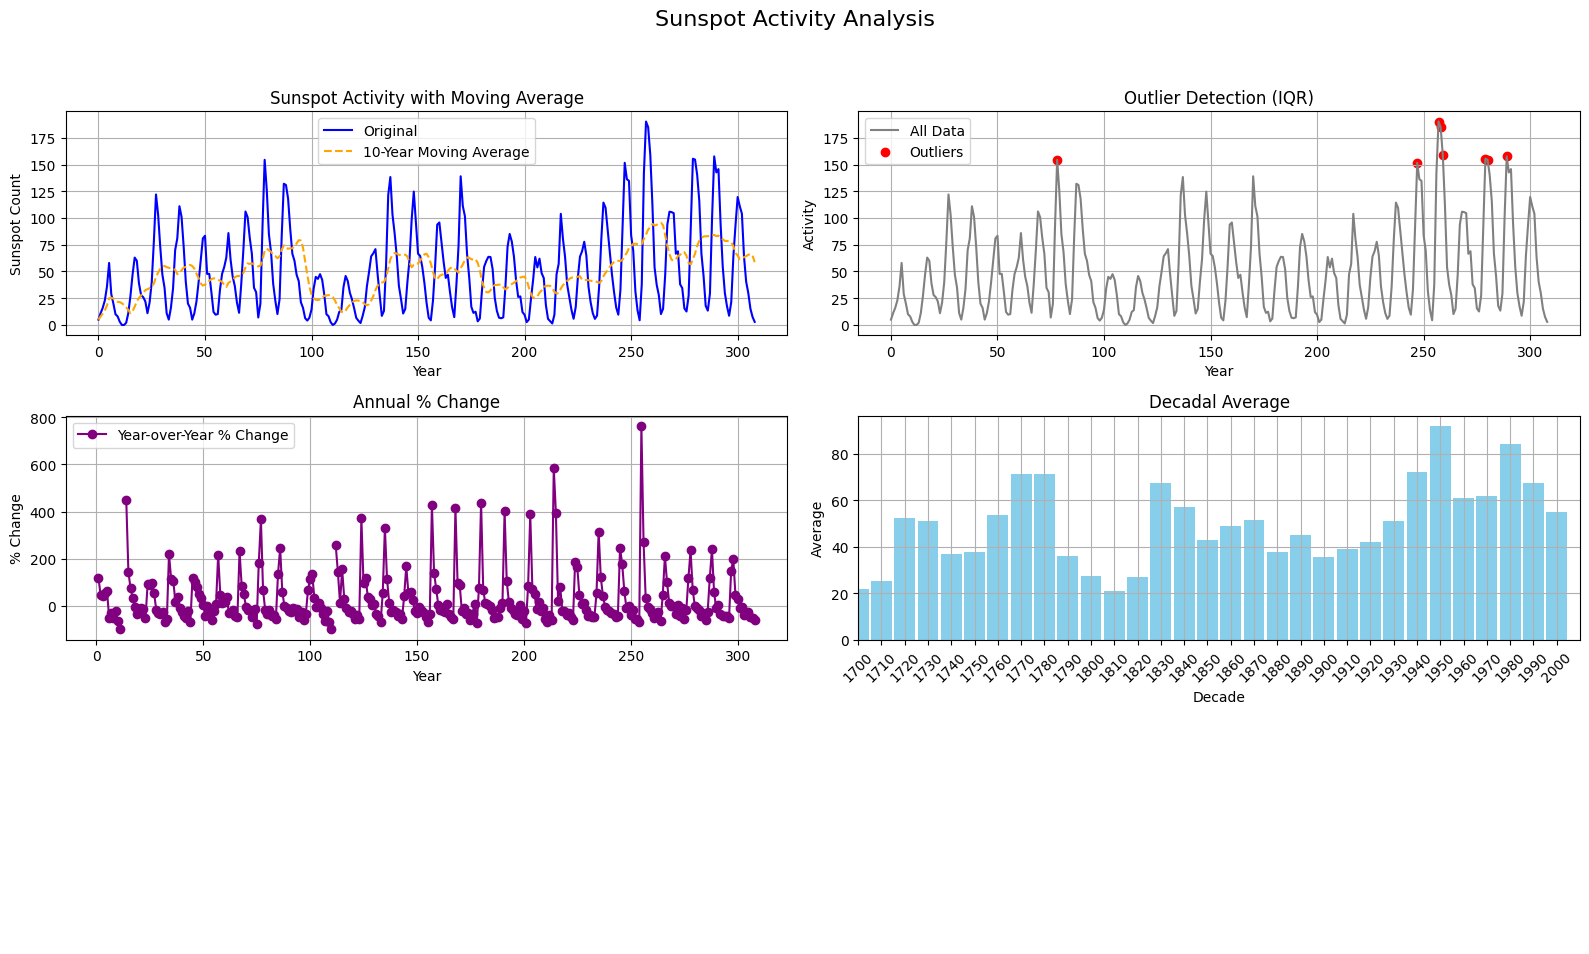

In [8]:
# -------------------------------
# [5] Ïã§ÌñâÌïòÏòÄÏùÑ Îïå Í≤∞Í≥ºÎ¨ºÏù¥ Í∞ôÏïÑÏïº Ìï©ÎãàÎã§.
# -------------------------------
df = load_and_prepare_data()
df, decade_avg = add_features(df)
plot_all_sunspot_analysis(df, decade_avg, ma_window=10)

---
# Q2. Sunspots Îç∞Ïù¥ÌÑ∞ ÌÜµÍ≥Ñ ÏöîÏïΩ & Streamlit Î∞∞Ìè¨

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis, gaussian_kde

In [9]:
# --------------------------------------------
# 1) Í∏∞Î≥∏ ÌÜµÍ≥Ñ ÏöîÏïΩ Î∞è Î∂ÑÌè¨ Î∂ÑÏÑù
# --------------------------------------------
# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ & Ï†ÑÏ≤òÎ¶¨
sun = load_and_prepare_data()
# Í∏∞Î≥∏ ÌÜµÍ≥Ñ ÏöîÏïΩ Ï∂úÎ†•
print("Í∏∞Î≥∏ ÌÜµÍ≥Ñ ÏöîÏïΩ:")
print(sun.describe())

# ÏôúÎèÑÏôÄ Ï≤®ÎèÑ Í≥ÑÏÇ∞
data_skew = skew(sun["SUNACTIVITY"])
data_kurtosis = kurtosis(sun["SUNACTIVITY"])


print("\nÎç∞Ïù¥ÌÑ∞ ÏôúÎèÑ (Skewness):", data_skew)
print("Îç∞Ïù¥ÌÑ∞ Ï≤®ÎèÑ (Kurtosis):", data_kurtosis)

Í∏∞Î≥∏ ÌÜµÍ≥Ñ ÏöîÏïΩ:
              YEAR  SUNACTIVITY
count   309.000000   309.000000
mean   1854.000000    49.752104
std      89.344838    40.452595
min    1700.000000     0.000000
25%    1777.000000    16.000000
50%    1854.000000    40.000000
75%    1931.000000    69.800000
max    2008.000000   190.200000

Îç∞Ïù¥ÌÑ∞ ÏôúÎèÑ (Skewness): 0.9857343925899044
Îç∞Ïù¥ÌÑ∞ Ï≤®ÎèÑ (Kurtosis): 0.41102334998273227


In [11]:
# --------------------------------------------
# 2) Í≤∞Ï∏°Ïπò Î∞è Ïù¥ÏÉÅÏπò ÌôïÏù∏
# --------------------------------------------

# Í≤∞Ï∏°Ïπò Í∞úÏàò ÌôïÏù∏
print("\nÍ≤∞Ï∏°Ïπò Í∞úÏàò:")
print(sun.isnull().sum())

# IQR Î∞©Î≤ïÏùÑ ÏÇ¨Ïö©Ìïú Ïù¥ÏÉÅÏπò ÌÉêÏßÄ
Q1 = sun["SUNACTIVITY"].quantile(0.25)
Q3 = sun["SUNACTIVITY"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"\nÏù¥ÏÉÅÏπò ÌÉêÏßÄÎ•º ÏúÑÌïú Í≤ΩÍ≥ÑÍ∞í: ÌïòÌïú {lower_bound}, ÏÉÅÌïú {upper_bound}")

# Ïù¥ÏÉÅÏπò Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
outliers = sun[(sun["SUNACTIVITY"] < lower_bound) | (sun["SUNACTIVITY"] > upper_bound)]

print("\nÌÉêÏßÄÎêú Ïù¥ÏÉÅÏπò:")
print(outliers)


Í≤∞Ï∏°Ïπò Í∞úÏàò:
YEAR           0
SUNACTIVITY    0
dtype: int64

Ïù¥ÏÉÅÏπò ÌÉêÏßÄÎ•º ÏúÑÌïú Í≤ΩÍ≥ÑÍ∞í: ÌïòÌïú -64.69999999999999, ÏÉÅÌïú 150.5

ÌÉêÏßÄÎêú Ïù¥ÏÉÅÏπò:
       YEAR  SUNACTIVITY
78   1778.0        154.4
247  1947.0        151.6
257  1957.0        190.2
258  1958.0        184.8
259  1959.0        159.0
279  1979.0        155.4
280  1980.0        154.6
289  1989.0        157.6


In [12]:
# --------------------------------------------
# 3) Ïã¨Ìôî ÏãúÍ∞ÅÌôî: Îã§Ï§ë ÏÑúÎ∏åÌîåÎ°Ø Íµ¨ÏÑ±
# --------------------------------------------
def plot_advanced_sunspot_visualizations(df, sunactivity_col='SUNACTIVITY'):
    """
    ÌÉúÏñëÌùëÏ†ê Îç∞Ïù¥ÌÑ∞Ïùò Ïã¨Ìôî ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌïú 2x2 ÏÑúÎ∏åÌîåÎ°Ø Ìï®Ïàò.

    Parameters:
        df: ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ (datetime index Ìè¨Ìï®)
        sunactivity_col (str): Î∂ÑÏÑù ÎåÄÏÉÅ Ïª¨ÎüºÎ™Ö (Í∏∞Î≥∏: 'SUNACTIVITY')
    """
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle("Sunspots Data Advanced Visualization", fontsize=16)
    # (a) Ï†ÑÏ≤¥ ÏãúÍ≥ÑÏó¥ ÎùºÏù∏ Ï∞®Ìä∏
    # Ï†ÑÏ≤¥ ÏãúÍ∞ÑÎåÄ(1700ÎÖÑ~2000ÎÖÑ+) ÎèôÏïàÏùò ÌùëÏ†ê Ïàò Ï∂îÏÑ∏ ÏãúÍ∞ÅÌôî

    axs[0, 0].plot(df["YEAR"], df[sunactivity_col], color='blue', linewidth=1)
    axs[0, 0].set_title("Sunspot Activity Over Time")
    axs[0, 0].set_xlabel("Year")
    axs[0, 0].set_ylabel(sunactivity_col)
    axs[0, 0].grid(True)


    # (b) Î∂ÑÌè¨: ÌûàÏä§ÌÜ†Í∑∏Îû® + Ïª§ÎÑê Î∞ÄÎèÑ

    data = df[sunactivity_col].dropna()
    xs = np.linspace(data.min(), data.max(), 200)


    density = gaussian_kde(data)
    axs[0, 1].hist(data, bins=30, density=True, alpha=0.6, color='gray', label='Histogram')
    axs[0, 1].plot(xs, density(xs), color='red', linewidth=2, label='Density')
    axs[0, 1].set_title("Distribution of Sunspot Activity")
    axs[0, 1].set_xlabel(sunactivity_col)
    axs[0, 1].set_ylabel("Density")
    axs[0, 1].legend()
    axs[0, 1].grid(True)

    # (c) ÏÉÅÏûê Í∑∏Î¶º: 1900ÎÖÑ~2000ÎÖÑ

    df_20th = df[(df["YEAR"] >= 1900) & (df["YEAR"] <= 2000)]


    axs[1, 0].boxplot(df_20th[sunactivity_col], vert=False)
    axs[1, 0].set_title("Boxplot of Sunspot Activity (1900-2000)")
    axs[1, 0].set_xlabel(sunactivity_col)

    # (d) ÏÇ∞Ï†êÎèÑ + ÌöåÍ∑ÄÏÑ†

    years = df["YEAR"].values
    sun_activity = df[sunactivity_col].values


    axs[1, 1].scatter(years, sun_activity, s=10, alpha=0.5, label='Data Points')
    coef = np.polyfit(years, sun_activity, 1)
    trend = np.poly1d(coef)
    axs[1, 1].plot(years, trend(years), color='red', linewidth=2, label='Trend Line')
    axs[1, 1].set_title("Trend of Sunspot Activity")
    axs[1, 1].set_xlabel("Year")
    axs[1, 1].set_ylabel(sunactivity_col)
    axs[1, 1].legend()
    axs[1, 1].grid(True)

    # Î†àÏù¥ÏïÑÏõÉ Ï†ïÎ¶¨
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

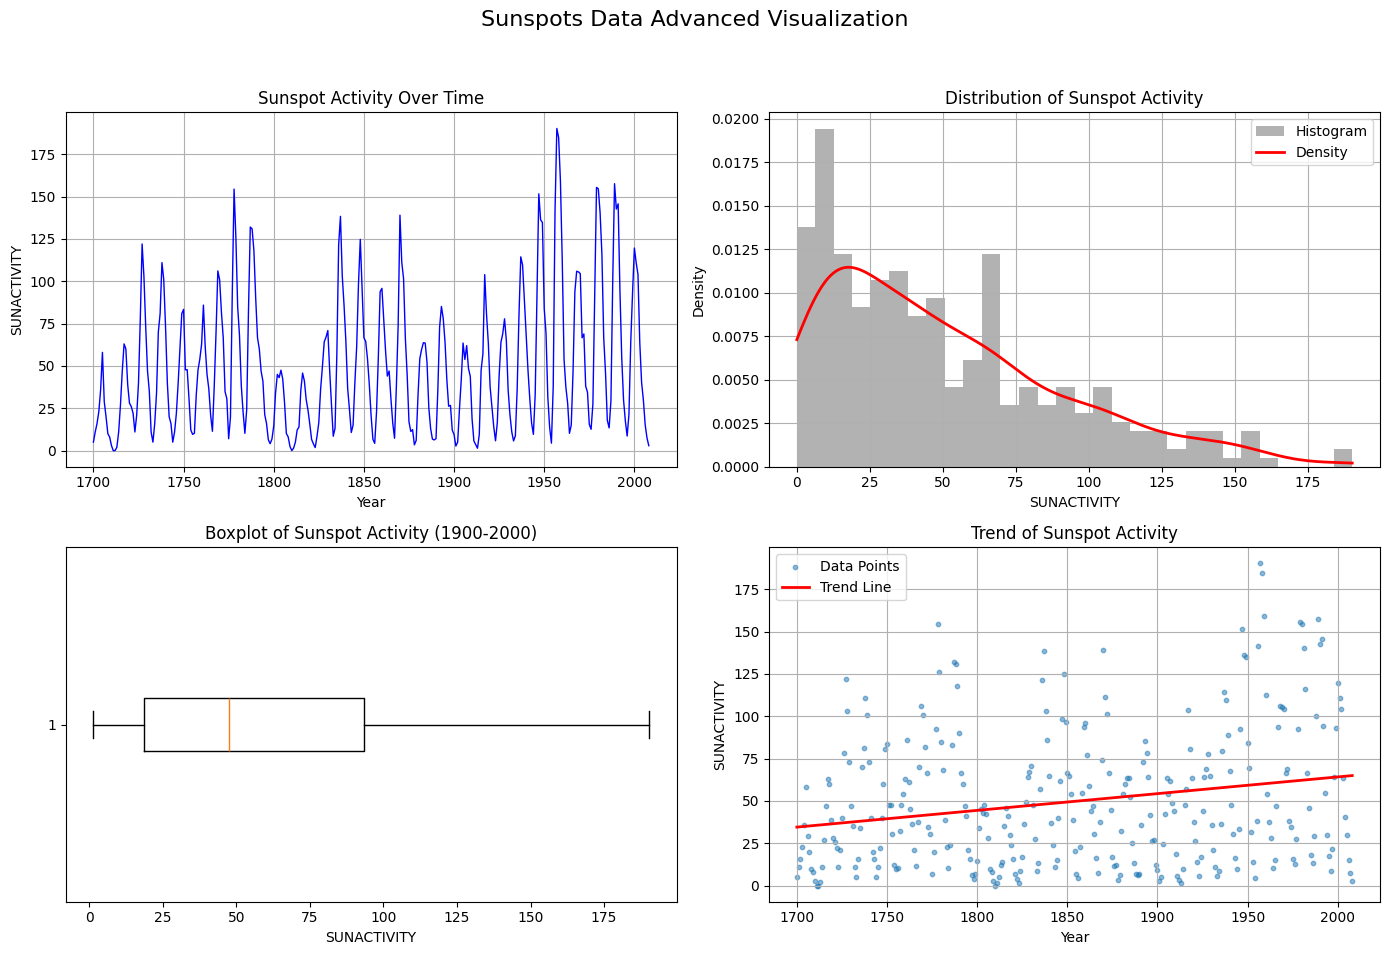

In [13]:
plot_advanced_sunspot_visualizations(df)

In [15]:
# --------------------------------------------
# 4) Streamlit Î∞∞Ìè¨
# sunspots.csv ÌååÏùºÏù¥ ÏóêÎîîÌÑ∞ Ìè¥ÎçîÏùò data/ÏïÑÎûòÏóê ÏûàÏñ¥Ïïº Ìï©ÎãàÎã§.
# --------------------------------------------
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

@st.cache_data
def load_data(file_path):
    df = pd.read_csv(file_path)
    if 'YEAR' in df.columns:
        # ÏÜåÏàòÏ†ê Ï†úÍ±∞ ÌõÑ Ï†ïÏàòÎ°ú Î≥ÄÌôò
        df['YEAR_INT'] = df['YEAR'].astype(int)
        df['DATE'] = pd.to_datetime(df['YEAR_INT'].astype(str), format='%Y')
        df.set_index('DATE', inplace=True)
    return df

def plot_advanced_sunspot_visualizations(df, sunactivity_col='SUNACTIVITY'):
    fig, axs = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle("Sunspots Data Advanced Visualization", fontsize=18)

    # (a) Ï†ÑÏ≤¥ ÏãúÍ≥ÑÏó¥ ÎùºÏù∏ Ï∞®Ìä∏
    axs[0, 0].plot(df['YEAR'], df[sunactivity_col], color='blue', linewidth=1)


    axs[0, 0].set_title("Sunspot Activity Over Time")
    axs[0, 0].set_xlabel("Year")
    axs[0, 0].set_ylabel("Sunspot Count")
    axs[0, 0].grid(True)

    # (b) Î∂ÑÌè¨: ÌûàÏä§ÌÜ†Í∑∏Îû® + Ïª§ÎÑê Î∞ÄÎèÑ
    data = df[sunactivity_col].dropna().values
    if len(data) > 0:  # Îç∞Ïù¥ÌÑ∞Í∞Ä ÏûàÎäîÏßÄ ÌôïÏù∏
        xs = np.linspace(data.min(), data.max(), 200)
        density = gaussian_kde(data)

        axs[0, 1].hist(data, bins=30, density=True, alpha=0.6, color='gray', label='Histogram')

        axs[0, 1].plot(xs, density(xs), color='red', linewidth=2, label='Density')
    axs[0, 1].set_title("Distribution of Sunspot Activity")
    axs[0, 1].set_xlabel("Sunspot Count")
    axs[0, 1].set_ylabel("Density")
    axs[0, 1].legend()
    axs[0, 1].grid(True)

    # (c) ÏÉÅÏûê Í∑∏Î¶º: 1900ÎÖÑ~2000ÎÖÑ
    try:
        df_20th = df.loc["1900":"2000"]
        if not df_20th.empty:
            axs[1, 0].boxplot(df_20th[sunactivity_col], vert=False)
            axs[1, 0].grid(True)

    except:
        # Ìï¥Îãπ Í∏∞Í∞Ñ Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏùÑ Í≤ΩÏö∞ ÏòàÏô∏ Ï≤òÎ¶¨
        pass
    axs[1, 0].set_title("Boxplot of Sunspot Activity (1900-2000)")
    axs[1, 0].set_xlabel("Sunspot Count")

    # (d) ÏÇ∞Ï†êÎèÑ + ÌöåÍ∑ÄÏÑ†
    years = df['YEAR'].values
    sun_activity = df[sunactivity_col].values

    # NaN Í∞í Ï†úÍ±∞
    mask = ~np.isnan(sun_activity)
    years_clean = years[mask]
    sun_activity_clean = sun_activity[mask]

    if len(years_clean) > 1:  # ÌöåÍ∑ÄÏÑ†ÏùÑ Í∑∏Î¶¨Í∏∞ ÏúÑÌï¥ ÏµúÏÜå 2Í∞ú Ïù¥ÏÉÅÏùò Îç∞Ïù¥ÌÑ∞ ÌïÑÏöî
        axs[1, 1].scatter(years_clean, sun_activity_clean, s=10, alpha=0.5, label='Data Points')
        coef = np.polyfit(years_clean, sun_activity_clean, 1)
        trend = np.poly1d(coef)
        axs[1, 1].plot(years_clean, trend(years_clean), color='red', linewidth=2, label='Trend Line')
    axs[1, 1].set_title("Trend of Sunspot Activity")
    axs[1, 1].set_xlabel("Year")
    axs[1, 1].set_ylabel("Sunspot Count")
    axs[1, 1].legend()
    axs[1, 1].grid(True)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    return fig

# Î©îÏù∏ Ïï±
st.title('üåû ÌÉúÏñëÌùëÏ†ê Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù ÎåÄÏãúÎ≥¥Îìú üåû')
st.markdown("""
    Ïù¥ ÎåÄÏãúÎ≥¥ÎìúÎäî ÌÉúÏñëÌùëÏ†ê Îç∞Ïù¥ÌÑ∞Î•º Îã§ÏñëÌïú ÏãúÍ∞ÅÌôî Î∞©Î≤ïÏúºÎ°ú Î≥¥Ïó¨Ï§çÎãàÎã§.
    """)

try:
    # Îç∞Ïù¥ÌÑ∞ Î°úÎìú
    df = load_data('data/sunspots.csv')

    # ÌïÑÌÑ∞ÎßÅÎêú Îç∞Ïù¥ÌÑ∞ - Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïö©
    filtered_df = df

    # ÏãúÍ∞ÅÌôî
    if not filtered_df.empty:
        st.subheader('ÌÉúÏñëÌùëÏ†ê Îç∞Ïù¥ÌÑ∞ Ï¢ÖÌï© ÏãúÍ∞ÅÌôî')
        fig = plot_advanced_sunspot_visualizations(filtered_df)
        st.pyplot(fig)
    else:
        st.warning("Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏäµÎãàÎã§.")

except Exception as e:
    st.error(f"Ïò§Î•òÍ∞Ä Î∞úÏÉùÌñàÏäµÎãàÎã§: {e}")
    st.info("Îç∞Ïù¥ÌÑ∞ ÌååÏùºÏùò Íµ¨Ï°∞Î•º ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî. 'data/sunspots.csv' ÌååÏùºÏù¥ Ï°¥Ïû¨ÌïòÍ≥† 'YEAR'ÏôÄ 'SUNACTIVITY' Ïª¨ÎüºÏù¥ ÏûàÏñ¥Ïïº Ìï©ÎãàÎã§.")

2025-07-22 12:48:35.968 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-07-22 12:48:35.969 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-22 12:48:36.410 
  command:

    streamlit run C:\Users\lsrro\AppData\Roaming\Python\Python313\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-07-22 12:48:36.411 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-22 12:48:36.411 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-22 12:48:36.412 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-22 12:48:36.412 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-22 12:48:36.412 Thread

In [ ]:
'''streamlit Ï£ºÏÜåÎ•º Ï†úÏ∂úÌï¥Ï£ºÏÑ∏Ïöî
Ï£ºÏÜåÎäî Ïù¥Î¶Ñ+2 Î°ú ÏÑ§Ï†ïÌï¥Ï£ºÏÑ∏Ïöî
'''
#ex https://HongGilDong2.streamlit.app

In [14]:
# streamlit Î∞∞Ìè¨ Í≤∞Í≥º
from IPython.display import Image, display
image_url = "https://i.imgur.com/Mq93Sgh.png"
display(Image(url=image_url, width=600))

# Q3. Streamlit ÏãúÍ∞ÅÌôî + Ïù∏ÌÑ∞ÎûôÏÖò Ï∂îÍ∞Ä

In [ ]:
# --------------------------------------------
# Streamlit ÏãúÍ∞ÅÌôî + Ïù∏ÌÑ∞ÎûôÏÖò Ï∂îÍ∞Ä
# sunspots.csv ÌååÏùºÏù¥ ÏóêÎîîÌÑ∞ Ìè¥ÎçîÏùò data/ÏïÑÎûòÏóê ÏûàÏñ¥Ïïº Ìï©ÎãàÎã§.
# Ïó∞ÎèÑÎ≤îÏúÑ, ÌûàÏä§ÌÜ†Í∑∏Îû® Íµ¨Í∞Ñ Ïàò, Ï∂îÏÑ∏ÏÑ† Ï∞®Ïàò, ÏÇ∞Ï†êÎèÑ Ï†ê ÌÅ¨Í∏∞, ÏÇ∞Ï†êÎèÑ Ìà¨Î™ÖÎèÑÎ•º Ï°∞Ï†àÌï† Ïàò ÏûàÎäî Í∏∞Îä•ÏùÑ Ï∂îÍ∞ÄÌï©ÎãàÎã§.
# --------------------------------------------
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

@st.cache_data
def load_data(file_path):
    df = pd.read_csv(file_path)
    if 'YEAR' in df.columns:
        # ÏÜåÏàòÏ†ê Ï†úÍ±∞ ÌõÑ Ï†ïÏàòÎ°ú Î≥ÄÌôò
        df['YEAR_INT'] = df['YEAR'].astype(int)
        df['DATE'] = pd.to_datetime(df['YEAR_INT'].astype(str), format='%Y')
        df.set_index('DATE', inplace=True)
    return df

def plot_advanced_sunspot_visualizations(df, sunactivity_col='SUNACTIVITY',
                                        hist_bins=30, trend_degree=1,
                                        point_size=10, point_alpha=0.5):
    fig, axs = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle("Sunspots Data Advanced Visualization", fontsize=18)

    # (a) Ï†ÑÏ≤¥ ÏãúÍ≥ÑÏó¥ ÎùºÏù∏ Ï∞®Ìä∏
    axs[0, 0].plot(df.index, df[sunactivity_col], color='blue')
    axs[0, 0].set_title("Sunspot Activity Over Time")
    axs[0, 0].set_xlabel("Year")
    axs[0, 0].set_ylabel("Sunspot Count")
    axs[0, 0].grid(True)

    # (b) Î∂ÑÌè¨: ÌûàÏä§ÌÜ†Í∑∏Îû® + Ïª§ÎÑê Î∞ÄÎèÑ
    data = df[sunactivity_col].dropna().values
    if len(data) > 0:  # Îç∞Ïù¥ÌÑ∞Í∞Ä ÏûàÎäîÏßÄ ÌôïÏù∏
        xs = np.linspace(data.min(), data.max(), 200)
        density = gaussian_kde(data)

        '''ÏΩîÎìúÎ•º ÏûëÏÑ±ÌïòÏãúÏò§'''

        axs[0, 1].plot(xs, density(xs), color='red', linewidth=2, label='Density')
    axs[0, 1].set_title("Distribution of Sunspot Activity")
    axs[0, 1].set_xlabel("Sunspot Count")
    axs[0, 1].set_ylabel("Density")
    axs[0, 1].legend()
    axs[0, 1].grid(True)

    # (c) ÏÉÅÏûê Í∑∏Î¶º: 1900ÎÖÑ~2000ÎÖÑ
    try:
        df_20th = df.loc["1900":"2000"]
        if not df_20th.empty:
            '''ÏΩîÎìúÎ•º ÏûëÏÑ±ÌïòÏãúÏò§'''

    except:
        # Ìï¥Îãπ Í∏∞Í∞Ñ Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏùÑ Í≤ΩÏö∞ ÏòàÏô∏ Ï≤òÎ¶¨
        pass
    axs[1, 0].set_title("Boxplot of Sunspot Activity (1900-2000)")
    axs[1, 0].set_xlabel("Sunspot Count")

    # (d) ÏÇ∞Ï†êÎèÑ + ÌöåÍ∑ÄÏÑ†
    years = df['YEAR'].values
    sun_activity = df[sunactivity_col].values

    # NaN Í∞í Ï†úÍ±∞
    mask = ~np.isnan(sun_activity)
    years_clean = years[mask]
    sun_activity_clean = sun_activity[mask]

    if len(years_clean) > 1:  # ÌöåÍ∑ÄÏÑ†ÏùÑ Í∑∏Î¶¨Í∏∞ ÏúÑÌï¥ ÏµúÏÜå 2Í∞ú Ïù¥ÏÉÅÏùò Îç∞Ïù¥ÌÑ∞ ÌïÑÏöî
        axs[1, 1].scatter(years_clean, sun_activity_clean, s=point_size, alpha=point_alpha, label='Data Points')
        coef = np.polyfit(years_clean, sun_activity_clean, trend_degree)
        trend = np.poly1d(coef)

        # Ï∂îÏÑ∏ÏÑ†ÏùÑ Í∑∏Î¶¨Í∏∞ ÏúÑÌïú x Í∞í ÏÉùÏÑ±
        x_trend = np.linspace(years_clean.min(), years_clean.max(), 100)
        axs[1, 1].plot(x_trend, trend(x_trend), color='red', linewidth=2, label='Trend Line')
    axs[1, 1].set_title("Trend of Sunspot Activity")
    axs[1, 1].set_xlabel("Year")
    axs[1, 1].set_ylabel("Sunspot Count")
    axs[1, 1].legend()
    axs[1, 1].grid(True)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    return fig

# Î©îÏù∏ Ïï±
st.title('üåû ÌÉúÏñëÌùëÏ†ê Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù ÎåÄÏãúÎ≥¥Îìú üåû')
st.markdown("""
    Ïù¥ ÎåÄÏãúÎ≥¥ÎìúÎäî ÌÉúÏñëÌùëÏ†ê Îç∞Ïù¥ÌÑ∞Î•º Îã§ÏñëÌïú ÏãúÍ∞ÅÌôî Î∞©Î≤ïÏúºÎ°ú Î≥¥Ïó¨Ï§çÎãàÎã§.
    """)

try:
    # Îç∞Ïù¥ÌÑ∞ Î°úÎìú
    df = load_data('data/sunspots.csv')

    # ÏÇ¨Ïù¥ÎìúÎ∞îÏóê ÌååÎùºÎØ∏ÌÑ∞ Ï°∞Ï†à Ïä¨ÎùºÏù¥Îçî Ï∂îÍ∞Ä
    '''ÏΩîÎìúÎ•º ÏûëÏÑ±ÌïòÏãúÏò§'''

    # Ïó∞ÎèÑ Î≤îÏúÑ ÏÑ†ÌÉù
    '''ÏΩîÎìúÎ•º ÏûëÏÑ±ÌïòÏãúÏò§'''


    # ÌûàÏä§ÌÜ†Í∑∏Îû® Îπà(bin) Ïàò Ï°∞Ï†à
    hist_bins = st.sidebar.slider(
        'ÌûàÏä§ÌÜ†Í∑∏Îû® Íµ¨Í∞Ñ Ïàò',
        min_value=5,
        max_value=100,
        value=30
    )

    # Ï∂îÏÑ∏ÏÑ† Ï∞®Ïàò Ï°∞Ï†à
    trend_degree = st.sidebar.slider(
        'Ï∂îÏÑ∏ÏÑ† Ï∞®Ïàò',
        min_value=1,
        max_value=5,
        value=1
    )

    # ÏÇ∞Ï†êÎèÑ Ï†ê ÌÅ¨Í∏∞ Ï°∞Ï†à
    '''ÏΩîÎìúÎ•º ÏûëÏÑ±ÌïòÏãúÏò§'''



    # ÏÇ∞Ï†êÎèÑ Ìà¨Î™ÖÎèÑ Ï°∞Ï†à
    '''ÏΩîÎìúÎ•º ÏûëÏÑ±ÌïòÏãúÏò§'''



    # ÌïÑÌÑ∞ÎßÅÎêú Îç∞Ïù¥ÌÑ∞
    filtered_df = df[(df['YEAR'] >= year_range[0]) & (df['YEAR'] <= year_range[1])]

    # ÏãúÍ∞ÅÌôî
    if not filtered_df.empty:
        st.subheader('ÌÉúÏñëÌùëÏ†ê Îç∞Ïù¥ÌÑ∞ Ï¢ÖÌï© ÏãúÍ∞ÅÌôî')
        fig = plot_advanced_sunspot_visualizations(
            filtered_df,
            hist_bins=hist_bins,
            trend_degree=trend_degree,
            point_size=point_size,
            point_alpha=point_alpha
        )
        st.pyplot(fig)
    else:
        st.warning("ÏÑ†ÌÉùÌïú Í∏∞Í∞ÑÏóê Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏäµÎãàÎã§.")

except Exception as e:
    st.error(f"Ïò§Î•òÍ∞Ä Î∞úÏÉùÌñàÏäµÎãàÎã§: {e}")
    st.info("Îç∞Ïù¥ÌÑ∞ ÌååÏùºÏùò Íµ¨Ï°∞Î•º ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî. 'data/sunspots.csv' ÌååÏùºÏù¥ Ï°¥Ïû¨ÌïòÍ≥† 'YEAR'ÏôÄ 'SUNACTIVITY' Ïª¨ÎüºÏù¥ ÏûàÏñ¥Ïïº Ìï©ÎãàÎã§.")

In [ ]:
'''streamlit Ï£ºÏÜåÎ•º Ï†úÏ∂úÌï¥Ï£ºÏÑ∏Ïöî
Ï£ºÏÜåÎäî Ïù¥Î¶Ñ+3 Î°ú ÏÑ§Ï†ïÌï¥Ï£ºÏÑ∏Ïöî
'''
#ex https://HongGilDong3.streamlit.app

In [ ]:
# streamlit Î∞∞Ìè¨ Í≤∞Í≥º
from IPython.display import Image, display
image_url = "https://i.imgur.com/lVpB5AP.png"
display(Image(url=image_url, width=600))

---
# Q4. Prophet Î™®Îç∏ ÌïôÏäµ

In [ ]:
'''
[1] Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ Î∞è Ï†ÑÏ≤òÎ¶¨
dataÎäî ÏúÑÏóêÏÑú Ï†úÍ≥µÌï¥ÎìúÎ¶∞ ÏΩîÎìúÎ°ú sunspotsÎ•º ÏÇ¨Ïö©ÌïòÍ≥†Ïûê Ìï©ÎãàÎã§.
ÌòÑÏû¨ Î™®Îç∏ ÌïôÏäµÏùÑ ÏúÑÌï¥ÏÑú Îã§ÏùåÍ≥º Í∞ôÏùÄ Ï†ÑÏ≤òÎ¶¨Î•º ÌïòÍ≥†Ïûê Ìï©ÎãàÎã§.
# - 'date'ÏôÄ 'SUNACTIVITY' Ïª¨ÎüºÎßå Ï∂îÏ∂ú, Îç∞Ïù¥ÌÑ∞ Î≥ÄÌôò
# - 1900ÎÖÑ Ïù¥ÌõÑ(1900-01-01 ~ 2008-01-01) datetime Îç∞Ïù¥ÌÑ∞Î°ú Ï†úÌïú, %Y-%m-%dÏùò ÌòïÌÉú

Ïù¥ ÎëêÍ∞ÄÏßÄÎ•º Í±∞Ï≥êÏÑú ÌïôÏäµÏùÑ ÌïòÍ≥†Ïûê Ìï©ÎãàÎã§.

Q1~Q2Î°úÎ∂ÄÌÑ∞ ÎÇòÏò® dfÎ•º Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©Ìï©ÎãàÎã§.
'''

processed_df = '''ÏΩîÎìúÎ•º ÏûëÏÑ±ÌïòÏãúÏò§'''

print("Îç∞Ïù¥ÌÑ∞ ÎØ∏Î¶¨Î≥¥Í∏∞:")
print(processed_df.head())

Îç∞Ïù¥ÌÑ∞ ÎØ∏Î¶¨Î≥¥Í∏∞:
            ds     y
200 1900-01-01   9.5
201 1901-01-01   2.7
202 1902-01-01   5.0
203 1903-01-01  24.4
204 1904-01-01  42.0


In [ ]:
# [2] Î™®Îç∏ ÌïôÏäµ
# - Í∏∞Î≥∏ yearly_seasonalityÎ•º ÎπÑÌôúÏÑ±ÌôîÌïòÍ≥†, changepoint_prior_scale Îì± ÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù
# - Sunspot Îç∞Ïù¥ÌÑ∞Ïùò Ï£ºÍ∏∞ÏÑ±(ÏïΩ 11ÎÖÑ)ÏùÑ Î∞òÏòÅÌïòÎäî Ïª§Ïä§ÌÖÄ ÏãúÏ¶åÏñºÎ¶¨Ìã∞ Ï∂îÍ∞Ä
from prophet import Prophet

model = Prophet(
    yearly_seasonality=False,  # Í∏∞Î≥∏ Ïó∞Í∞Ñ ÏãúÏ¶åÏñºÎ¶¨Ìã∞ ÎπÑÌôúÏÑ±Ìôî
    changepoint_prior_scale=0.05,
    seasonality_mode='additive'
)
# ÏïΩ 11ÎÖÑ Ï£ºÍ∏∞Ïùò ÌÉúÏñë ÌùëÏ†ê ÏÇ¨Ïù¥ÌÅ¥ÏùÑ Ïª§Ïä§ÌÖÄ ÏãúÏ¶åÏñºÎ¶¨Ìã∞Î°ú Ï∂îÍ∞Ä (fourier_orderÎäî Îç∞Ïù¥ÌÑ∞Ïóê Îî∞Îùº Ï°∞Ï†ï)
model.add_seasonality(name='sunspot_cycle', period=11, fourier_order=5)
# Î™®Îç∏ ÌïôÏäµ
model.fit(processed_df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqrdqqc7_/nb0lgk04.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqrdqqc7_/e4x2fys9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99381', 'data', 'file=/tmp/tmpqrdqqc7_/nb0lgk04.json', 'init=/tmp/tmpqrdqqc7_/e4x2fys9.json', 'output', 'file=/tmp/tmpqrdqqc7_/prophet_model3b9ctzof/prophet_model-20250404144857.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:48:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:48:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# [3] ÏòàÏ∏°
# - 50ÎÖÑ Îí§ÍπåÏßÄ ÏòàÏ∏°ÌïòÍ∏∞ ÏúÑÌïú future DataFrame ÏÉùÏÑ± (Ïó∞ Îã®ÏúÑ)
future = model.make_future_dataframe(periods=50, freq='Y')
forecast = model.predict(future)
print("\nForecast ÏÉÅÏúÑ 5Ìñâ:")
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())


Forecast ÏÉÅÏúÑ 5Ìñâ:
          ds       yhat  yhat_lower  yhat_upper
0 1900-01-01  41.194331  -17.392842   98.572105
1 1901-01-01  48.750280   -9.323614  105.432477
2 1902-01-01  55.225632   -2.975891  116.573712
3 1903-01-01  60.719475    2.632876  119.650610
4 1904-01-01  53.813352   -5.136381  109.200574


INFO:prophet:Making 4 forecasts with cutoffs between 1983-01-07 00:00:00 and 1998-01-03 00:00:00



ÍµêÏ∞® Í≤ÄÏ¶ù ÏãúÏûë...


  0%|          | 0/4 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpqrdqqc7_/9z9z5n1s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqrdqqc7_/_ogazhc5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30507', 'data', 'file=/tmp/tmpqrdqqc7_/9z9z5n1s.json', 'init=/tmp/tmpqrdqqc7_/_ogazhc5.json', 'output', 'file=/tmp/tmpqrdqqc7_/prophet_model89d20ggg/prophet_model-20250404144911.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:49:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:49:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqrdqqc7_/fqj8kuoq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqrdqqc7_/skc5sgv9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local


Performance Metrics ÏÉÅÏúÑ 5Ìñâ:
   horizon          mse       rmse        mae      mape     mdape     smape  \
0 363 days  3298.983693  57.436780  51.026713  1.021075  0.793220  0.624521   
1 725 days  4622.836058  67.991441  60.415939  1.986260  1.437259  0.801225   
2 726 days  4056.028574  63.686958  55.953991  1.967058  1.398854  0.770390   
3 727 days  4556.196066  67.499600  59.136907  2.576717  2.618172  0.850986   
4 728 days  4828.079676  69.484384  65.669917  2.626778  2.618172  0.911832   

   coverage  
0      0.50  
1      0.25  
2      0.50  
3      0.50  
4      0.50  


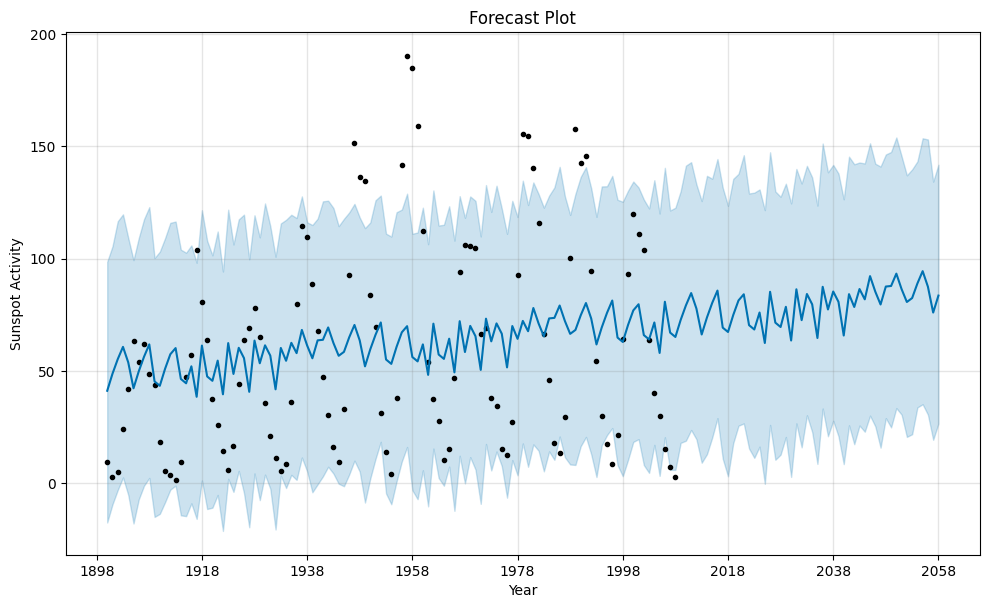

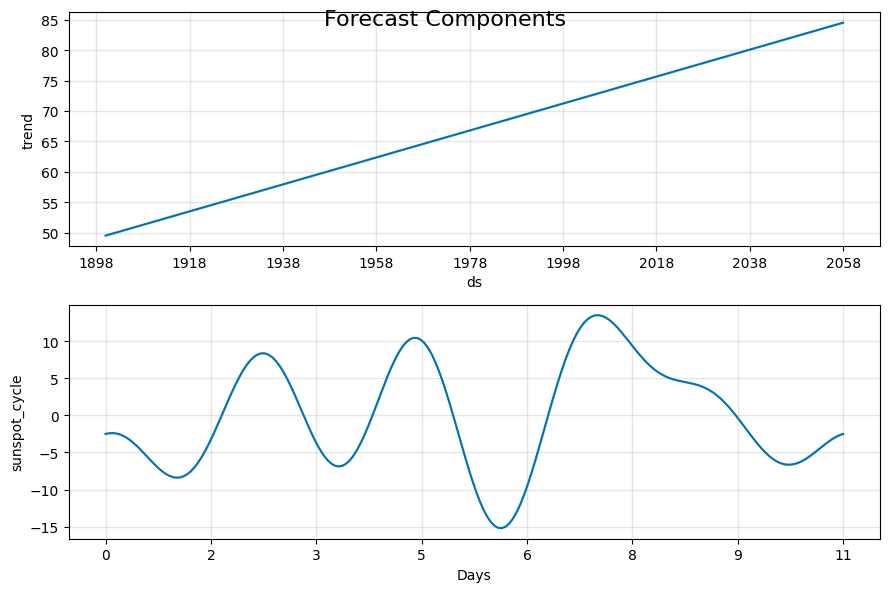

In [ ]:
# [4] Î™®Îç∏ ÏßÑÎã®: ÍµêÏ∞® Í≤ÄÏ¶ù Î∞è ÏÑ±Îä• ÌèâÍ∞Ä (ÏÑ†ÌÉù ÏÇ¨Ìï≠)
# ProphetÏùò ÍµêÏ∞® Í≤ÄÏ¶ù Í∏∞Îä•ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÏòàÏ∏° ÏÑ±Îä•ÏùÑ ÌèâÍ∞ÄÌï©ÎãàÎã§.
# Îç∞Ïù¥ÌÑ∞ Í∏∞Í∞ÑÏù¥ 1900~2008ÎÖÑÏù¥ÎØÄÎ°ú, Ï¥àÍ∏∞ ÌïôÏäµ Í∏∞Í∞ÑÏùÄ 80ÎÖÑ, horizonÏùÄ 10ÎÖÑ, periodÎäî 5ÎÖÑÏúºÎ°ú ÏÑ§Ï†ïÌï©ÎãàÎã§.
from prophet.diagnostics import cross_validation, performance_metrics

print("\nÍµêÏ∞® Í≤ÄÏ¶ù ÏãúÏûë...")
cv_results = cross_validation(model, initial='29200 days', period='1825 days', horizon='3650 days')
perf_metrics = performance_metrics(cv_results)
print("\nPerformance Metrics ÏÉÅÏúÑ 5Ìñâ:")
print(perf_metrics.head())

# [5] ÏòàÏ∏° Í≤∞Í≥º ÏãúÍ∞ÅÌôî (ÏòàÏ∏° Íµ¨ÏÑ±ÏöîÏÜå ÌîåÎ°Ø)
fig1 = model.plot(forecast)
plt.title("Forecast Plot")
plt.xlabel("Year")
plt.ylabel("Sunspot Activity")
plt.show()

fig2 = model.plot_components(forecast)
plt.suptitle("Forecast Components", fontsize=16)
plt.show()

---
# Q5. Prophet ÏòàÏ∏° Í≤∞Í≥º ÏãúÍ∞ÅÌôî & Stremalit Î∞∞Ìè¨

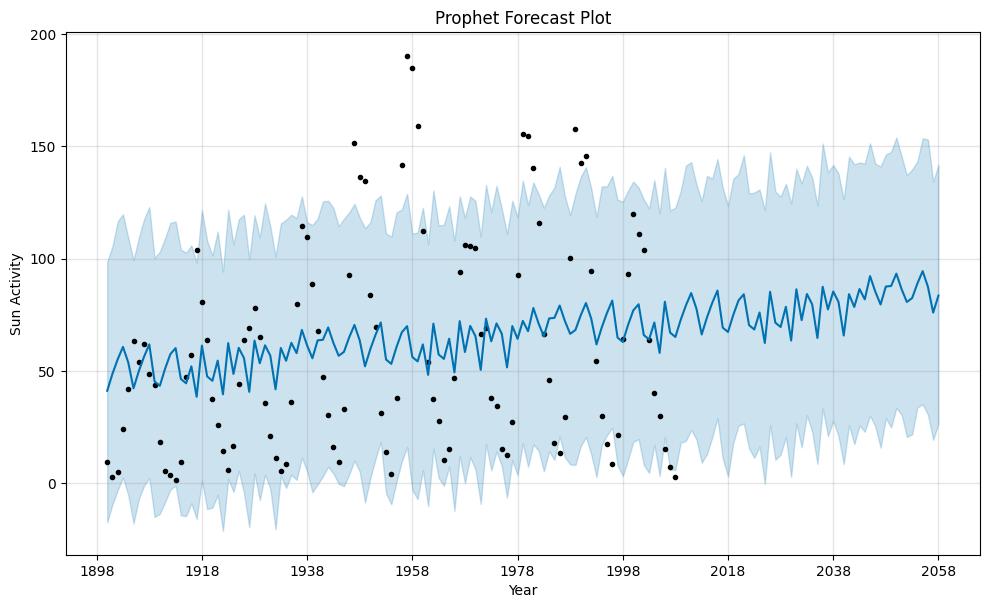

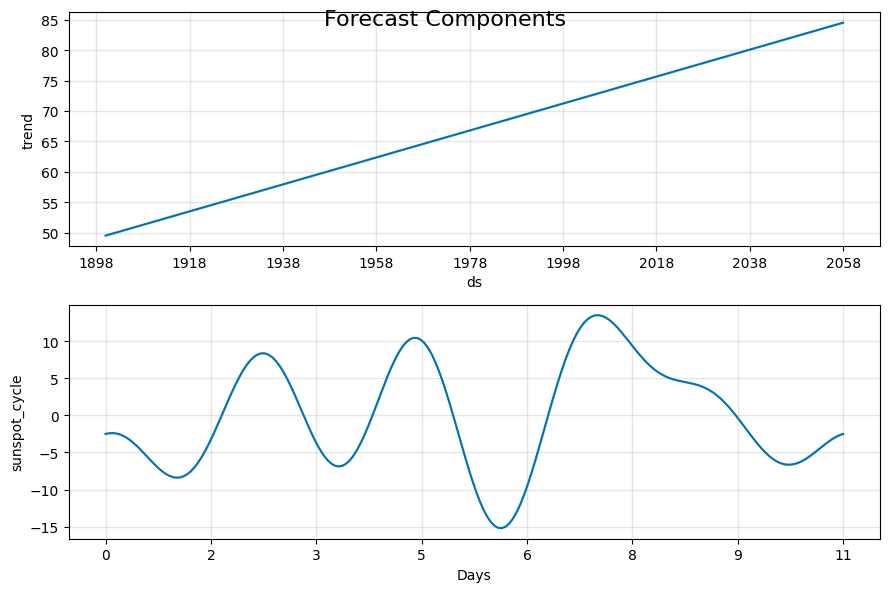

In [ ]:
# --------------------------------------------------
# [1] Prophet ÎÇ¥Ïû• ÏãúÍ∞ÅÌôî
# --------------------------------------------------
# TODO 1: model.plot()Í≥º model.plot_components()Î•º ÏÇ¨Ïö©ÌïòÏó¨ ProphetÏùò Í∏∞Î≥∏ ÏãúÍ∞ÅÌôîÎ•º Ï∂úÎ†•ÌïòÏÑ∏Ïöî.

'''ÏΩîÎìúÎ•º ÏûëÏÑ±ÌïòÏãúÏò§'''
# Prophet Î™®Îç∏Ïù¥ Ï†úÍ≥µÌïòÎäî Í∏∞Î≥∏ ÌîåÎ°Ø Ìï®ÏàòÎ°ú ÏòàÏ∏° Í≤∞Í≥ºÏôÄ Íµ¨ÏÑ±ÏöîÏÜåÎ•º ÏãúÍ∞ÅÌôîÌï©ÎãàÎã§.


fig2 = model.plot_components(forecast)
plt.suptitle("Forecast Components", fontsize=16)
plt.show()



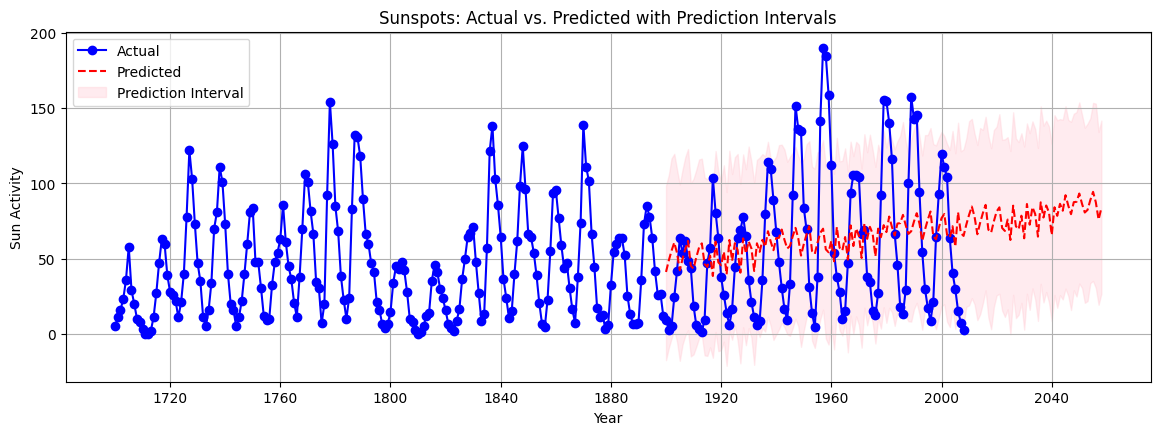

In [ ]:
# --------------------------------------------------
# [2] Ïã§Ï†ú Í∞íÍ≥º ÏòàÏ∏° Í∞í ÎπÑÍµê: Ïª§Ïä§ÌÖÄ ÏãúÍ∞ÅÌôî (ÎùºÏù∏ Ï∞®Ìä∏ + Ïã†Î¢∞Íµ¨Í∞Ñ)
# --------------------------------------------------
# TODO 2: Ïã§Ï†úÍ∞í, ÏòàÏ∏°Í∞í, Ïã†Î¢∞Íµ¨Í∞ÑÏùÑ ÌïòÎÇòÏùò plotÏóê Ìï®Íªò ÏãúÍ∞ÅÌôîÌïòÏÑ∏Ïöî.

plt.figure(figsize=(14, 10))
plt.subplot(2, 1, 1)

'''ÏΩîÎìúÎ•º ÏûëÏÑ±ÌïòÏãúÏò§'''
# ÌûåÌä∏:
# plt.plot(df.index, df["SUNACTIVITY"], ...)
# plt.plot(forecast["ds"], forecast["yhat"], ...)
# plt.fill_between(forecast["ds"], forecast["yhat_lower"], forecast["yhat_upper"], ...)


plt.title("Sunspots: Actual vs. Predicted with Prediction Intervals")
plt.xlabel("Year")
plt.ylabel("Sun Activity")
plt.legend()
plt.grid(True)

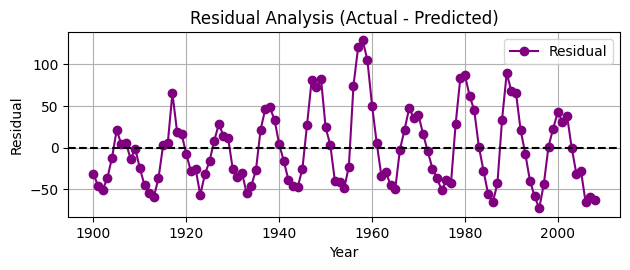

In [ ]:
# --------------------------------------------------
# [3] ÏûîÏ∞®(Residual) Î∂ÑÏÑù: ÏòàÏ∏°Í∞íÍ≥º Ïã§Ï†úÍ∞íÏùò Ï∞®Ïù¥ ÏãúÍ∞ÅÌôî
# --------------------------------------------------
# TODO 3: dfÏôÄ forecastÎ•º ÎÇ†Ïßú Í∏∞Ï§ÄÏúºÎ°ú Î≥ëÌï©ÌïòÍ≥†, ÏûîÏ∞®Î•º Í≥ÑÏÇ∞Ìïú Îí§ ÏãúÍ∞ÅÌôîÌïòÏÑ∏Ïöî.

# 3-1. dfÏùò Ïù∏Îç±Ïä§Î•º Ï¥àÍ∏∞ÌôîÌïòÍ≥†, ÎÇ†Ïßú Ïª¨ÎüºÎ™ÖÏùÑ Prophet ÌòïÏãù(ds)ÏúºÎ°ú Î≥ÄÍ≤Ω
'''ÏΩîÎìúÎ•º ÏûëÏÑ±ÌïòÏãúÏò§'''


# 3-2. forecastÏôÄ Î≥ëÌï© (inner join) ÌõÑ residual Ïª¨Îüº ÏÉùÏÑ±
'''ÏΩîÎìúÎ•º ÏûëÏÑ±ÌïòÏãúÏò§'''


# 3-3. ÏûîÏ∞® ÏãúÍ∞ÅÌôî
plt.subplot(2, 1, 2)

'''ÏΩîÎìúÎ•º ÏûëÏÑ±ÌïòÏãúÏò§'''
# ÌûåÌä∏:
# plt.plot(merged["ds"], merged["residual"], ...)
# plt.axhline(0, ...)  # Í∏∞Ï§ÄÏÑ†

plt.title("Residual Analysis (Actual - Predicted)")
plt.xlabel("Year")
plt.ylabel("Residual")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
# ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ Î°úÎìú

import statsmodels.api as sm
df = sm.datasets.sunspots.load_pandas().data
df["YEAR"] = df["YEAR"].astype(int)
df["date"] = pd.to_datetime(df["YEAR"], format="%Y")
df = df.set_index("date").sort_index()

# ProphetÏö© Ï†ÑÏ≤òÎ¶¨
# 1. Ïù∏Îç±Ïä§Î•º Îã§Ïãú Ïª¨ÎüºÏúºÎ°ú Î≥ÄÌôò(reset_index)
# 2. ProphetÏùÄ ÏûÖÎ†• Ïª¨ÎüºÎ™ÖÏúºÎ°ú 'ds'(ÎÇ†Ïßú)ÏôÄ 'y'(ÌÉÄÍ≤üÍ∞í)Î•º ÏöîÍµ¨ÌïòÎØÄÎ°ú Ïª¨ÎüºÎ™Ö Î≥ÄÍ≤Ω
''' ÏΩîÎìú ÏûëÏÑ± '''
processed_df =



# 1900-01-01Î∂ÄÌÑ∞ 2008-01-01ÍπåÏßÄÏùò Îç∞Ïù¥ÌÑ∞Îßå ÌïÑÌÑ∞ÎßÅ
# Prophet Î™®Îç∏ ÌïôÏäµÏóê ÏÇ¨Ïö©Ìï† Í∏∞Í∞ÑÏùÑ Ï†úÌïúÌï®
''' ÏΩîÎìú ÏûëÏÑ± '''
processed_df =


# Ï†ÑÏ≤òÎ¶¨Îêú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÑ CSV ÌååÏùº(Í≤ΩÎ°ú: ./sunspots_for_prophet.csv)Î°ú Ï†ÄÏû•
# index=False ÏòµÏÖòÏùÄ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùò Ïù∏Îç±Ïä§Î•º CSVÏóê Ìè¨Ìï®ÏãúÌÇ§ÏßÄ ÏïäÏùå
# Ï†ÄÏû•Ìïú ÌååÏùºÎèÑ Í∞ôÏù¥ Ï†úÏ∂úÌï¥Ï£ºÏÑ∏Ïöî.
''' ÏΩîÎìú ÏûëÏÑ± '''


print("‚úÖ prophetÏö© Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû• ÏôÑÎ£å!")


‚úÖ prophetÏö© Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû• ÏôÑÎ£å!


In [ ]:
# --------------------------------------------------
# [4] ÏãúÍ∞ÅÌôîÌïú ÎÇ¥Ïö©ÏùÑ SteamlitÏóê Î∞∞Ìè¨ÌïòÏÑ∏Ïöî.
# ÏúÑÏóêÏÑú ÏÉùÏÑ±Ìïú sunspots_for_prophet.csvÎ•º Îã§Ïö¥Î°úÎìú Î∞õÏïÑ, Î£®Ìä∏/data ÏïÑÎûòÏóê ÎÑ£Ïñ¥Ï£ºÏÑ∏Ïöî.
# --------------------------------------------------
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# ÌéòÏù¥ÏßÄ ÏÑ§Ï†ï
st.set_page_config(page_title="üåû Sunspot Forecast", layout="wide")
st.title("üåû Prophet Forecast with Preprocessed Sunspot Data")

# ----------------------------------
# [1] Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
# ----------------------------------
# TODO: 'sunspots_for_prophet.csv' ÌååÏùºÏùÑ Î∂àÎü¨Ïò§Í≥†, 'ds' Ïª¨ÎüºÏùÑ datetime ÌòïÏãùÏúºÎ°ú Î≥ÄÌôòÌïòÏÑ∏Ïöî.
'''ÏΩîÎìúÎ•º ÏûëÏÑ±ÌïòÏãúÏò§'''


st.subheader("üìÑ Îç∞Ïù¥ÌÑ∞ ÎØ∏Î¶¨Î≥¥Í∏∞")
'''ÏΩîÎìúÎ•º ÏûëÏÑ±ÌïòÏãúÏò§'''

# ----------------------------------
# [2] Prophet Î™®Îç∏ Ï†ïÏùò Î∞è ÌïôÏäµ
# ----------------------------------
# TODO: Prophet Î™®Îç∏ÏùÑ ÏÉùÏÑ±ÌïòÍ≥†, 11ÎÖÑ Ï£ºÍ∏∞ Ïª§Ïä§ÌÖÄ seasonalityÎ•º Ï∂îÍ∞ÄÌïú ÌõÑ ÌïôÏäµÌïòÏÑ∏Ïöî.
'''ÏΩîÎìúÎ•º ÏûëÏÑ±ÌïòÏãúÏò§'''

# ----------------------------------
# [3] ÏòàÏ∏° ÏàòÌñâ
# ----------------------------------
# TODO: 30ÎÖÑÍ∞Ñ Ïó∞ Îã®ÏúÑ ÏòàÏ∏°ÏùÑ ÏàòÌñâÌïòÍ≥†, Í≤∞Í≥ºÎ•º forecastÏóê Ï†ÄÏû•ÌïòÏÑ∏Ïöî.
'''ÏΩîÎìúÎ•º ÏûëÏÑ±ÌïòÏãúÏò§'''

# ----------------------------------
# [4] Í∏∞Î≥∏ ÏãúÍ∞ÅÌôî
# ----------------------------------
st.subheader("üìà Prophet Forecast Plot")
# TODO: model.plot()ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÏòàÏ∏° Í≤∞Í≥ºÎ•º ÏãúÍ∞ÅÌôîÌïòÏÑ∏Ïöî.
'''ÏΩîÎìúÎ•º ÏûëÏÑ±ÌïòÏãúÏò§'''

st.subheader("üìä Forecast Components")
# TODO: model.plot_components()Î•º ÏÇ¨Ïö©ÌïòÏó¨ Íµ¨ÏÑ±ÏöîÏÜåÎ•º ÏãúÍ∞ÅÌôîÌïòÏÑ∏Ïöî.
'''ÏΩîÎìúÎ•º ÏûëÏÑ±ÌïòÏãúÏò§'''

# ----------------------------------
# [5] Ïª§Ïä§ÌÖÄ ÏãúÍ∞ÅÌôî: Ïã§Ï†úÍ∞í vs ÏòàÏ∏°Í∞í + Ïã†Î¢∞Íµ¨Í∞Ñ
# ----------------------------------
st.subheader("üìâ Custom Plot: Actual vs Predicted with Prediction Intervals")

# TODO: Ïã§Ï†úÍ∞í, ÏòàÏ∏°Í∞í, Ïã†Î¢∞Íµ¨Í∞ÑÏùÑ ÌïòÎÇòÏùò plotÏóê ÏãúÍ∞ÅÌôîÌïòÏÑ∏Ïöî.
fig3, ax = plt.subplots(figsize=(14, 6))

'''ÏΩîÎìúÎ•º ÏûëÏÑ±ÌïòÏãúÏò§'''
# ÌûåÌä∏:
# ax.plot(df["ds"], df["y"], ...)
# ax.plot(forecast["ds"], forecast["yhat"], ...)
# ax.fill_between(forecast["ds"], forecast["yhat_lower"], forecast["yhat_upper"], ...)

st.pyplot(fig3)

# ----------------------------------
# [6] ÏûîÏ∞® Î∂ÑÏÑù ÏãúÍ∞ÅÌôî
# ----------------------------------
st.subheader("üìâ Residual Analysis (ÏòàÏ∏° Ïò§Ï∞® Î∂ÑÏÑù)")

# TODO: dfÏôÄ forecastÎ•º 'ds' Í∏∞Ï§ÄÏúºÎ°ú Î≥ëÌï©ÌïòÏó¨ residual Ïª¨ÎüºÏùÑ ÏÉùÏÑ±ÌïòÏÑ∏Ïöî.
'''ÏΩîÎìúÎ•º ÏûëÏÑ±ÌïòÏãúÏò§'''

# TODO: residual ÏãúÍ≥ÑÏó¥ÏùÑ ÏãúÍ∞ÅÌôîÌïòÏÑ∏Ïöî.
fig4, ax2 = plt.subplots(figsize=(14, 4))

'''ÏΩîÎìúÎ•º ÏûëÏÑ±ÌïòÏãúÏò§'''
# ÌûåÌä∏:
# ax2.plot(merged["ds"], merged["residual"], ...)
# ax2.axhline(0, ...)

st.pyplot(fig4)

# ----------------------------------
# [7] ÏûîÏ∞® ÌÜµÍ≥Ñ ÏöîÏïΩ Ï∂úÎ†•
# ----------------------------------
st.subheader("üìå Residual Summary Statistics")
# TODO: merged["residual"].describe()Î•º Ï∂úÎ†•ÌïòÏÑ∏Ïöî.
'''ÏΩîÎìúÎ•º ÏûëÏÑ±ÌïòÏãúÏò§'''


In [ ]:
'''streamlit Ï£ºÏÜåÎ•º Ï†úÏ∂úÌï¥Ï£ºÏÑ∏Ïöî
Ï£ºÏÜåÎäî Ïù¥Î¶Ñ+5 Î°ú ÏÑ§Ï†ïÌï¥Ï£ºÏÑ∏Ïöî
'''
#ex https://HongGilDong5.streamlit.app

In [ ]:
# streamlit Î∞∞Ìè¨ Í≤∞Í≥º
from IPython.display import Image, display
image_url = "https://i.imgur.com/b3e0XU7.png"
display(Image(url=image_url, width=600))

# Q6. Î®∏Ïã†Îü¨Îãù Ïã§Ïäµ 1

In [ ]:
'''
# Ï±ÑÎ¨¥Î∂àÏù¥Ìñâ Îç∞Ïù¥ÌÑ∞Î°ú ÏòàÏ∏° Î™®Îç∏ÏùÑ ÌïôÏäµÏãúÌÇ§Í≥†, Î≤†Ïä§Ìä∏ Î™®Îç∏Í≥º accuracyÎ•º ÎΩëÏïÑÎÉÖÎãàÎã§.
# test.csv, train.csvÎ•º Î£®Ìä∏ Ìè¥Îçî ÏïÑÎûò ÏóÖÎ°úÎìúÌï©ÎãàÎã§.
# ÌååÏùº Îã§Ïö¥Î°úÎìú ÎßÅÌÅ¨: https://www.notion.so/metacodem/8-1cc13fa025c08037b713f2d64021b06b

'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import warnings
warnings.filterwarnings('ignore')

# 1. Îç∞Ïù¥ÌÑ∞ Î°úÎìú
'''ÏΩîÎìúÎ•º ÏûëÏÑ±ÌïòÏãúÏò§'''



In [ ]:
# 2. Îç∞Ïù¥ÌÑ∞ ÌÉêÏÉâ Î∞è Í∏∞Î≥∏ Î∂ÑÏÑù
'''ÏΩîÎìúÎ•º ÏûëÏÑ±ÌïòÏãúÏò§'''


Train Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (10000, 18)
Test Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (2062, 17)


In [ ]:
# 3. Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ Ìï®Ïàò Ï†ïÏùò
def preprocess_data(df, is_train=True):
    # Î≥µÏÇ¨Î≥∏ ÏÉùÏÑ±
    df_copy = df.copy()

    # 3.1 Î≤îÏ£ºÌòï Î≥ÄÏàò Ï≤òÎ¶¨Î•º ÏúÑÌïú ÏÇ¨Ï†Ñ Ï†ïÏùò (ÏàúÏÑúÍ∞Ä ÏûàÎäî Î≥ÄÏàò Ï≤òÎ¶¨)
    tenure_order = {
        '1ÎÖÑ ÎØ∏Îßå': 0,
        '1ÎÖÑ': 1,
        '2ÎÖÑ': 2,
        '3ÎÖÑ': 3,
        '4ÎÖÑ': 4,
        '5ÎÖÑ': 5,
        '6ÎÖÑ': 6,
        '7ÎÖÑ': 7,
        '8ÎÖÑ': 8,
        '9ÎÖÑ': 9,
        '10ÎÖÑ Ïù¥ÏÉÅ': 10
    }

    loan_term_order = {
        'Îã®Í∏∞ ÏÉÅÌôò': 0,
        'Ïû•Í∏∞ ÏÉÅÌôò': 1
    }

    # 3.2 ÌäπÏÑ± ÏóîÏßÄÎãàÏñ¥ÎßÅ

    # 3.2.1 Í∑ºÏÜç Ïó∞Ïàò Ïà´ÏûêÎ°ú Î≥ÄÌôò
    df_copy['Í∑ºÏÜç_Ïó∞Ïàò_Ïà´Ïûê'] = df_copy['ÌòÑÏû¨ ÏßÅÏû• Í∑ºÏÜç Ïó∞Ïàò'].map(tenure_order)

    # 3.2.2 ÎåÄÏ∂ú ÏÉÅÌôò Í∏∞Í∞Ñ Ïà´ÏûêÎ°ú Î≥ÄÌôò
    df_copy['ÏÉÅÌôò_Í∏∞Í∞Ñ_Ïà´Ïûê'] = df_copy['ÎåÄÏ∂ú ÏÉÅÌôò Í∏∞Í∞Ñ'].map(loan_term_order)

    # 3.2.3 ÏÜåÎìù ÎåÄÎπÑ Î∂ÄÏ±Ñ ÎπÑÏú® Í≥ÑÏÇ∞
    df_copy['ÏÜåÎìù_ÎåÄÎπÑ_Î∂ÄÏ±Ñ_ÎπÑÏú®'] = df_copy['ÌòÑÏû¨ ÎåÄÏ∂ú ÏûîÏï°'] / df_copy['Ïó∞Í∞Ñ ÏÜåÎìù']

    # 3.2.4 Ïõî ÏÉÅÌôòÏï° ÎåÄÎπÑ ÏÜåÎìù ÎπÑÏú®
    df_copy['Ïõî_ÏÉÅÌôòÏï°_ÎåÄÎπÑ_ÏÜåÎìù_ÎπÑÏú®'] = (df_copy['Ïõî ÏÉÅÌôò Î∂ÄÏ±ÑÏï°'] * 12) / df_copy['Ïó∞Í∞Ñ ÏÜåÎìù']

    # 3.2.5 ÎåÄÏ∂ú ÏûîÏï° ÎåÄÎπÑ ÎØ∏ÏÉÅÌôò Ïã†Ïö©Ïï° ÎπÑÏú®
    df_copy['ÎåÄÏ∂ú_ÎåÄÎπÑ_ÎØ∏ÏÉÅÌôò_ÎπÑÏú®'] = df_copy['ÌòÑÏû¨ ÎØ∏ÏÉÅÌôò Ïã†Ïö©Ïï°'] / (df_copy['ÌòÑÏû¨ ÎåÄÏ∂ú ÏûîÏï°'] + 1)  # 0ÏúºÎ°ú ÎÇòÎàÑÍ∏∞ Î∞©ÏßÄ

    # 3.2.6 Ïã†Ïö© ÏúÑÌóò ÏßÄÏàò (Í∞ÄÏ§ëÏπò Ìï©)
    df_copy['Ïã†Ïö©_ÏúÑÌóò_ÏßÄÏàò'] = (
        df_copy['Ïã†Ïö© Î¨∏Ï†ú Î∞úÏÉù ÌöüÏàò'] * 0.3 +
        df_copy['Ï≤¥ÎÇ© ÏÑ∏Í∏à ÏïïÎ•ò ÌöüÏàò'] * 0.3 +
        df_copy['Í∞úÏù∏ ÌååÏÇ∞ ÌöüÏàò'] * 0.4
    )

    # 3.2.7 Ïã†Ïö© ÌôúÎèô ÏßÄÏàò
    df_copy['Ïã†Ïö©_ÌôúÎèô_ÏßÄÏàò'] = df_copy['Í∞úÏÑ§Îêú Ïã†Ïö©Í≥ÑÏ¢å Ïàò'] / (df_copy['Ïã†Ïö© Í±∞Îûò Ïó∞Ïàò'] + 1)  # 0ÏúºÎ°ú ÎÇòÎàÑÍ∏∞ Î∞©ÏßÄ

    # 3.2.8 ÎßàÏßÄÎßâ Ïó∞Ï≤¥ Î°úÍ∑∏ Î≥ÄÌôò (0Ïù∏ Í≤ΩÏö∞ Ï≤òÎ¶¨)
    df_copy['Ïó∞Ï≤¥_Î°úÍ∑∏'] = np.log1p(df_copy['ÎßàÏßÄÎßâ Ïó∞Ï≤¥ Ïù¥ÌõÑ Í≤ΩÍ≥º Í∞úÏõî Ïàò'])

    # 3.2.9 Ïã†Ïö© Ï†êÏàò Íµ¨Í∞ÑÌôî
    df_copy['Ïã†Ïö©_Ï†êÏàò_Íµ¨Í∞Ñ'] = pd.cut(df_copy['Ïã†Ïö© Ï†êÏàò'],
                                bins=[0, 580, 670, 740, 800, 850],
                                labels=['Îß§Ïö∞ ÎÇÆÏùå', 'ÎÇÆÏùå', 'Î≥¥ÌÜµ', 'Ï¢ãÏùå', 'Îß§Ïö∞ Ï¢ãÏùå'])

    # 3.3 ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÏùÑ Ïó¥ Ï†úÍ±∞('UID', 'ÌòÑÏû¨ ÏßÅÏû• Í∑ºÏÜç Ïó∞Ïàò', 'ÎåÄÏ∂ú ÏÉÅÌôò Í∏∞Í∞Ñ')
    ''' ÏΩîÎìú ÏûëÏÑ± '''


    df_copy = df_copy.drop(columns=columns_to_drop)

    # 3.4 ÌÉÄÍ≤ü Î≥ÄÏàò Î∂ÑÎ¶¨ (ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Ïù∏ Í≤ΩÏö∞)
    if is_train:
        X = df_copy.drop(columns=['Ï±ÑÎ¨¥ Î∂àÏù¥Ìñâ Ïó¨Î∂Ä'])
        y = df_copy['Ï±ÑÎ¨¥ Î∂àÏù¥Ìñâ Ïó¨Î∂Ä']
        return X, y
    else:
        return df_copy

In [ ]:
# 4. Î™®Îç∏ ÌïôÏäµ Î∞è ÌèâÍ∞ÄÎ•º ÏúÑÌïú Ìï®Ïàò
def train_and_evaluate_model(model, X_train, X_val, y_train, y_val, name='Î™®Îç∏'):
    model.fit(X_train, y_train)

    # ÏòàÏ∏°
    y_pred = ''' ÏΩîÎìú ÏûëÏÑ± '''
    y_prob = model.predict_proba(X_val)[:, 1]

    # ÌèâÍ∞Ä ÏßÄÌëú
    accuracy = ''' ÏΩîÎìú ÏûëÏÑ± '''
    roc_auc = roc_auc_score(y_val, y_prob)

    print(f"\n{name} ÏÑ±Îä•:")
    print(f"Ï†ïÌôïÎèÑ: {accuracy:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print(classification_report(y_val, y_pred))

    return model, accuracy, roc_auc


In [ ]:
# 5. Î©îÏù∏ Ïã§Ìñâ ÏΩîÎìú
def main(epochs=100):
    print("\n" + "="*50)
    print("Ï±ÑÎ¨¥ Î∂àÏù¥Ìñâ ÏòàÏ∏° Î™®Îç∏ Í∞úÎ∞ú ÏãúÏûë")
    print("="*50)

    # 7.1 Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
    X, y = ''' ÏΩîÎìú ÏûëÏÑ± '''

    print(f"\nÏ†ÑÏ≤òÎ¶¨ ÌõÑ ÌäπÏÑ± Í∞úÏàò: {X.shape[1]}")

    # 7.2 Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï† (ÌïôÏäµ, Í≤ÄÏ¶ù)
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    print(f"ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: {X_train.shape[0]} ÏÉòÌîå")
    print(f"Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: {X_val.shape[0]} ÏÉòÌîå")

    # 7.3 ÌäπÏÑ± Ïä§ÏºÄÏùºÎßÅ Î∞è Ïù∏ÏΩîÎî© ÌååÏù¥ÌîÑÎùºÏù∏ ÏÑ§Ï†ï
    categorical_features = ['Ï£ºÍ±∞ ÌòïÌÉú', 'ÎåÄÏ∂ú Î™©Ï†Å', 'Ïã†Ïö©_Ï†êÏàò_Íµ¨Í∞Ñ']
    numerical_features = [col for col in X.columns if col not in categorical_features]

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_features),
            ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
        ]
    )

    # 7.4 Ï†ÑÏ≤òÎ¶¨ ÌååÏù¥ÌîÑÎùºÏù∏ Ï†ÅÏö©
    X_train_processed = preprocessor.fit_transform(X_train)
    X_val_processed = preprocessor.transform(X_val)

    # 7.5 DataFrameÏúºÎ°ú Î≥ÄÌôò (ÌäπÏÑ±Î™Ö Ìè¨Ìï®)
    # OneHotEncoderÍ∞Ä ÏÉùÏÑ±Ìïú ÌäπÏÑ± Ïù¥Î¶Ñ Ï∂îÏ∂ú
    cat_feature_names = []
    for i, feature in enumerate(categorical_features):
        categories = preprocessor.transformers_[1][1].categories_[i][1:]  # 'first'Î•º dropÌñàÏúºÎØÄÎ°ú Ï≤´ Î≤àÏß∏ Î≤îÏ£º Ï†úÏô∏
        cat_feature_names.extend([f"{feature}_{category}" for category in categories])

    # Ï†ÑÏ≤òÎ¶¨Îêú Îç∞Ïù¥ÌÑ∞Ïùò ÌäπÏÑ± Ïù¥Î¶Ñ ÏÑ§Ï†ï
    feature_names = numerical_features + cat_feature_names

    # Ìù¨ÏÜå ÌñâÎ†¨ÏùÑ dense Î∞∞Ïó¥Î°ú Î≥ÄÌôò (ÌïÑÏöîÌïú Í≤ΩÏö∞)
    if hasattr(X_train_processed, "toarray"):
        X_train_processed = X_train_processed.toarray()
        X_val_processed = X_val_processed.toarray()

    # DataFrameÏúºÎ°ú Î≥ÄÌôò
    X_train_processed_df = ''' ÏΩîÎìú ÏûëÏÑ± '''
    X_val_processed_df = ''' ÏΩîÎìú ÏûëÏÑ± '''

    # 8. Îã§ÏñëÌïú Î™®Îç∏ ÌïôÏäµ Î∞è ÌèâÍ∞Ä

    # 8.1 Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä
    print("\n=== Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä ===")
    ''' ÏΩîÎìú ÏûëÏÑ± '''

    # 8.2 ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏
    print("\n=== ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ ===")
    ''' ÏΩîÎìú ÏûëÏÑ± '''

    # 8.3 Í∑∏ÎûòÎîîÏñ∏Ìä∏ Î∂ÄÏä§ÌåÖ
    print("\n=== Í∑∏ÎûòÎîîÏñ∏Ìä∏ Î∂ÄÏä§ÌåÖ ===")
    ''' ÏΩîÎìú ÏûëÏÑ± '''

    # 8.4 XGBoost
    print("\n=== XGBoost ===")
    ''' ÏΩîÎìú ÏûëÏÑ± '''

    # 8.5 LightGBM
    print("\n=== LightGBM ===")
    ''' ÏΩîÎìú ÏûëÏÑ± '''

    # 9. Î™®Îç∏ ÏÑ±Îä• ÎπÑÍµê Î∞è ÏµúÏ¢Ö Î™®Îç∏ ÏÑ†ÌÉù
    # Î™®Îç∏ Ï†ïÌôïÎèÑ Í∏∞Î∞ò ÏµúÏ¢Ö ÏÑ†ÌÉù
    model_accuracies = {
        "Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä": lr_accuracy,
        "ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏": rf_accuracy,
        "Í∑∏ÎûòÎîîÏñ∏Ìä∏ Î∂ÄÏä§ÌåÖ": gb_accuracy,
        "XGBoost": xgb_accuracy,
        "LightGBM": lgbm_accuracy
    }

    best_model_name = max(model_accuracies.items(), key=lambda x: x[1])[0]
    final_accuracy = model_accuracies[best_model_name]

    if best_model_name == "Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä":
        final_model = lr_model
    elif best_model_name == "ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏":
        final_model = rf_model
    elif best_model_name == "Í∑∏ÎûòÎîîÏñ∏Ìä∏ Î∂ÄÏä§ÌåÖ":
        final_model = gb_model
    elif best_model_name == "XGBoost":
        final_model = xgb_model
    elif best_model_name == "LightGBM":
        final_model = lgbm_model

    # 10. Í≤∞Í≥º ÏöîÏïΩ Î∞è ÏµúÏ¢Ö ÏÑ±Îä• Ï∂úÎ†•
    print("\n" + "="*50)
    print(f"ÏµúÏ¢Ö ÏÑ†ÌÉù Î™®Îç∏: {best_model_name}")
    print(f"ÏµúÏ¢Ö Í≤ÄÏ¶ù ÏÑ∏Ìä∏ Ï†ïÌôïÎèÑ: {final_accuracy:.4f}")
    print("="*50)

    # Î™®Îç∏ Î≥Ñ ÏÑ±Îä• ÏöîÏïΩ Ï∂úÎ†•
    print("\nÎ™®Îç∏ ÏÑ±Îä• ÏöîÏïΩ:")

    # ÏÑ±Îä• ÏàúÏúºÎ°ú Ï†ïÎ†¨ÌïòÏó¨ Ï∂úÎ†•
    sorted_models = sorted(model_accuracies.items(), key=lambda x: x[1], reverse=True)
    for i, (model_name, accuracy) in enumerate(sorted_models):
        print(f"{i+1}ÏúÑ. {model_name}: Ï†ïÌôïÎèÑ {accuracy:.4f}")

    # Î™ÖÏãúÏ†ÅÏúºÎ°ú ÏµúÏ¢Ö Ï†ïÌôïÎèÑ Ï∂úÎ†•
    print("\nÏµúÏ†ÅÏùò Î™®Îç∏Î°ú Ï†ïÌôïÎèÑ {:.4f}Î•º Îã¨ÏÑ±ÌïòÏòÄÏäµÎãàÎã§.".format(final_accuracy))

    return final_model, best_model_name, final_accuracy

In [ ]:
  # Ï∂úÎ†•
  EPOCHS = 100

  print("\nÌïôÏäµ ÏãúÏûë...")
  final_model, final_model_name, final_accuracy = main(epochs=EPOCHS)
  print("\nÌïôÏäµ ÏôÑÎ£å! ÏµúÏ¢Ö Ï†ïÌôïÎèÑ: {:.4f}".format(final_accuracy))


ÌïôÏäµ ÏãúÏûë...

Ï±ÑÎ¨¥ Î∂àÏù¥Ìñâ ÏòàÏ∏° Î™®Îç∏ Í∞úÎ∞ú ÏãúÏûë

Ï†ÑÏ≤òÎ¶¨ ÌõÑ ÌäπÏÑ± Í∞úÏàò: 23
ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: 8000 ÏÉòÌîå
Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: 2000 ÏÉòÌîå

=== Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä ===

Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä ÏÑ±Îä•:
Ï†ïÌôïÎèÑ: 0.7050
ROC AUC: 0.7245
              precision    recall  f1-score   support

           0       0.73      0.89      0.80      1318
           1       0.62      0.35      0.45       682

    accuracy                           0.70      2000
   macro avg       0.67      0.62      0.62      2000
weighted avg       0.69      0.70      0.68      2000


=== ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ ===

ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ ÏÑ±Îä•:
Ï†ïÌôïÎèÑ: 0.7260
ROC AUC: 0.7278
              precision    recall  f1-score   support

           0       0.74      0.91      0.81      1318
           1       0.68      0.38      0.48       682

    accuracy                           0.73      2000
   macro avg       0.71      0.64      0.65      2000
weighted avg       0.72      0.73      0.70   

---
# Q7. Î®∏Ïã†Îü¨Îãù Ïã§Ïäµ 2




In [ ]:
'''
# Ïú†Î∞©Ïïî ÏßÑÎã® Î∂ÑÎ•ò Î™®Îç∏ÏùÑ ÌïôÏäµÏãúÏºú accuracy 0.97 Ïù¥ÏÉÅÏùÑ Îã¨ÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî.
'''
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import warnings

'''ÏΩîÎìú Ï∂îÍ∞Ä'''
warnings.filterwarnings('ignore')

# Î™©Ìëú Ï†ïÌôïÎèÑ ÏÑ§Ï†ï
TARGET_ACCURACY = 0.97

# Îç∞Ïù¥ÌÑ∞ Î°úÎìú
print("=== Ïú†Î∞©Ïïî ÏßÑÎã® Î∂ÑÎ•ò Î™®Îç∏ Í∞úÎ∞ú ===")
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = cancer.target

# Îç∞Ïù¥ÌÑ∞ÏÖã Í∏∞Î≥∏ Ï†ïÎ≥¥ Ï∂úÎ†•
print(f"Îç∞Ïù¥ÌÑ∞ÏÖã ÌÅ¨Í∏∞: {X.shape}")
print(f"ÌÅ¥ÎûòÏä§ Î∂ÑÌè¨: {np.bincount(y)} (0: ÏïÖÏÑ±, 1: ÏñëÏÑ±)")

# Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
# 1. Ï∂îÍ∞Ä ÌäπÏÑ± ÏÉùÏÑ±
def create_features(X):
    df = X.copy()

    # ÌèâÍ∑†-ÏµúÏïÖ ÌäπÏÑ± Í∞Ñ Ï∞®Ïù¥ Î∞è ÎπÑÏú® Í≥ÑÏÇ∞
    for base in ['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness']:
        mean_col = f'mean {base}'
        worst_col = f'worst {base}'
        if mean_col in df.columns and worst_col in df.columns:
            df[f'{base}_diff'] = df[worst_col] - df[mean_col]
            df[f'{base}_ratio'] = df[worst_col] / (df[mean_col] + 1e-8)

    return df

# ÌäπÏÑ± ÏóîÏßÄÎãàÏñ¥ÎßÅ Ï†ÅÏö©
X_processed = create_features(X)
print(f"ÌäπÏÑ± ÏóîÏßÄÎãàÏñ¥ÎßÅ ÌõÑ ÌäπÏÑ± Í∞úÏàò: {X_processed.shape[1]}")

=== Ïú†Î∞©Ïïî ÏßÑÎã® Î∂ÑÎ•ò Î™®Îç∏ Í∞úÎ∞ú ===
Îç∞Ïù¥ÌÑ∞ÏÖã ÌÅ¨Í∏∞: (569, 30)
ÌÅ¥ÎûòÏä§ Î∂ÑÌè¨: [212 357] (0: ÏïÖÏÑ±, 1: ÏñëÏÑ±)
ÌäπÏÑ± ÏóîÏßÄÎãàÏñ¥ÎßÅ ÌõÑ ÌäπÏÑ± Í∞úÏàò: 42


In [ ]:
# 2. Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42, stratify=y
)
''' ÏΩîÎìú ÏûëÏÑ± '''



ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (455, 42)
ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (114, 42)


In [ ]:
# 3. Îç∞Ïù¥ÌÑ∞ Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
''' ÏΩîÎìú ÏûëÏÑ± '''
# X_train_scaled =
# X_test_scaled =

In [ ]:
# 4. Î™®Îç∏ ÌïôÏäµ
print("\n=== Î™®Îç∏ ÌïôÏäµ ===")
''' ÏΩîÎìú ÏûëÏÑ± '''







print("Î™®Îç∏ ÌïôÏäµ ÏôÑÎ£å")


=== Î™®Îç∏ ÌïôÏäµ ===
Î™®Îç∏ ÌïôÏäµ ÏôÑÎ£å


In [ ]:
# ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

# Î∂ÑÎ•ò Î≥¥Í≥†ÏÑú Ï∂úÎ†•
print("\n=== Î™®Îç∏ ÏÑ±Îä• ÌèâÍ∞Ä ===")
print(f"Ï†ïÌôïÎèÑ: {accuracy:.4f}")
print("\nÎ∂ÑÎ•ò Î≥¥Í≥†ÏÑú:")
print(classification_report(y_test, y_pred, target_names=['ÏïÖÏÑ±', 'ÏñëÏÑ±']))

# Ï§ëÏöî ÌäπÏÑ± Ï∂úÎ†•
feature_importances = pd.DataFrame({
    'feature': X_processed.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n=== Ï§ëÏöî ÌäπÏÑ± (ÏÉÅÏúÑ 10Í∞ú) ===")
print(feature_importances.head(10))

# Î™©Ìëú Ï†ïÌôïÎèÑ Îã¨ÏÑ± Ïó¨Î∂Ä ÌôïÏù∏
print("\n=== Î™©Ìëú Ï†ïÌôïÎèÑ ÌèâÍ∞Ä ===")
if accuracy >= TARGET_ACCURACY:
    print(f"‚úÖ Î™©Ìëú Ï†ïÌôïÎèÑ({TARGET_ACCURACY:.4f})Î•º Îã¨ÏÑ±ÌñàÏäµÎãàÎã§! Î™®Îç∏ Ï†ïÌôïÎèÑ: {accuracy:.4f}")
else:
    print(f"‚ùå Î™©Ìëú Ï†ïÌôïÎèÑ({TARGET_ACCURACY:.4f})Ïóê ÎèÑÎã¨ÌïòÏßÄ Î™ªÌñàÏäµÎãàÎã§. Î™®Îç∏ Ï†ïÌôïÎèÑ: {accuracy:.4f}")
    print(f"Î™©ÌëúÍπåÏßÄ ÎÇ®ÏùÄ Ï∞®Ïù¥: {(TARGET_ACCURACY - accuracy):.4f}")


=== Î™®Îç∏ ÏÑ±Îä• ÌèâÍ∞Ä ===
Ï†ïÌôïÎèÑ: 0.9737

Î∂ÑÎ•ò Î≥¥Í≥†ÏÑú:
              precision    recall  f1-score   support

          ÏïÖÏÑ±       0.98      0.95      0.96        42
          ÏñëÏÑ±       0.97      0.99      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


=== Ï§ëÏöî ÌäπÏÑ± (ÏÉÅÏúÑ 10Í∞ú) ===
                 feature  importance
36             area_diff    0.142677
22       worst perimeter    0.105833
20          worst radius    0.095978
27  worst concave points    0.090752
7    mean concave points    0.086974
30           radius_diff    0.081744
23            worst area    0.059723
34        perimeter_diff    0.048864
0            mean radius    0.033319
31          radius_ratio    0.028633

=== Î™©Ìëú Ï†ïÌôïÎèÑ ÌèâÍ∞Ä ===
‚úÖ Î™©Ìëú Ï†ïÌôïÎèÑ(0.9700)Î•º Îã¨ÏÑ±ÌñàÏäµÎãàÎã§! Î™®Îç∏ Ï†ïÌôïÎèÑ: 0.9737


---
# Q8. Tensor Îã§Î£®Í∏∞

In [ ]:
##########################################
# 1. Tensor Aggregation (element-wise Ïó∞ÏÇ∞, min, max, mean)
# ÏïÑÎûò ÌîÑÎ¶∞Ìä∏Îêú Í≤∞Í≥ºÏôÄ ÎèôÏùºÌïòÍ≤å ÎÇòÏôÄÏïº Ìï©ÎãàÎã§.
##########################################

import torch
import numpy as np

# ==================================================
# 1) Advanced Element-wise Operations with Broadcasting
# ==================================================
# Í∏∞Î≥∏ 2x2 ÌÖêÏÑú Ï†ïÏùò
a = torch.tensor([[1, 2], [3, 4]])
b = torch.tensor([[5, 6], [7, 8]])
# Î∏åÎ°úÎìúÏ∫êÏä§ÌåÖ ÏòàÏ†úÎ•º ÏúÑÌïú 2x1 ÌÖêÏÑú Ï†ïÏùò
c = torch.tensor([[10], [20]])

print("=== Tensor a ===")
print(a)
print("=== Tensor b ===")
print(b)
print("=== Tensor c (for broadcasting) ===")
print(c)

# element-wise Ïó∞ÏÇ∞: ÎçßÏÖà, Î∫ÑÏÖà, Í≥±ÏÖà, ÎÇòÎàóÏÖà
print("\n--- Element-wise Operations ---")
''' ÏΩîÎìú ÏûëÏÑ± '''



# Broadcasting: aÏôÄ cÏùò ÌÅ¨Í∏∞Í∞Ä Îã§Î•¥ÏßÄÎßå, ÏûêÎèô Î∏åÎ°úÎìúÏ∫êÏä§ÌåÖÏúºÎ°ú Ïó∞ÏÇ∞ ÏàòÌñâ
print("\n--- Broadcasting Operation ---")
''' ÏΩîÎìú ÏûëÏÑ± '''


# ==================================================
# 2) Advanced Aggregation on a 3D Tensor
# ==================================================
# 0Î∂ÄÌÑ∞ 99 ÏÇ¨Ïù¥Ïùò Ï†ïÏàòÎ°ú Ï±ÑÏõåÏßÑ 3x4x5 ÌÅ¨Í∏∞Ïùò 3Ï∞®Ïõê ÌÖêÏÑúÎ•º ÏÉùÏÑ±
tensor_3d = torch.randint(0, 100, (3, 4, 5))
print("\n=== 3D Tensor ===")
''' ÏΩîÎìú ÏûëÏÑ± '''


# Ï†ÑÏ≤¥ ÌÖêÏÑúÏóê ÎåÄÌïú ÏßëÍ≥Ñ Ïó∞ÏÇ∞ (min, max, mean, std, var)
print("\n--- Global Aggregations on 3D Tensor ---")
''' ÏΩîÎìú ÏûëÏÑ± '''


# floatÌòïÏúºÎ°ú Î≥ÄÌôòÌïòÏó¨ ÌèâÍ∑†, ÌëúÏ§ÄÌé∏Ï∞®, Î∂ÑÏÇ∞ Í≥ÑÏÇ∞
''' ÏΩîÎìú ÏûëÏÑ± '''


# Í∞Å Ï∞®Ïõê(dim)Î≥Ñ ÏµúÏÜåÍ∞í Î∞è Ìï¥Îãπ Ïù∏Îç±Ïä§ Í≥ÑÏÇ∞
''' ÏΩîÎìú ÏûëÏÑ± '''



print("\nMinimum along dim=0:")
''' ÏΩîÎìú ÏûëÏÑ± '''
print("Indices along dim=0:")
''' ÏΩîÎìú ÏûëÏÑ± '''
print("\nMinimum along dim=1:")
''' ÏΩîÎìú ÏûëÏÑ± '''
print("Indices along dim=1:")
''' ÏΩîÎìú ÏûëÏÑ± '''
print("\nMinimum along dim=2:")
''' ÏΩîÎìú ÏûëÏÑ± '''
print("Indices along dim=2:")
''' ÏΩîÎìú ÏûëÏÑ± '''

# Í∞Å Ï∞®ÏõêÎ≥Ñ ÏµúÎåÄÍ∞í Í≥ÑÏÇ∞
''' ÏΩîÎìú ÏûëÏÑ± '''


print("\nMaximum along dim=0:")
''' ÏΩîÎìú ÏûëÏÑ± '''
print("Indices along dim=0:")
''' ÏΩîÎìú ÏûëÏÑ± '''
print("\nMaximum along dim=1:")
''' ÏΩîÎìú ÏûëÏÑ± '''
print("Indices along dim=1:")
''' ÏΩîÎìú ÏûëÏÑ± '''
print("\nMaximum along dim=2:")
''' ÏΩîÎìú ÏûëÏÑ± '''
print("Indices along dim=2:")
''' ÏΩîÎìú ÏûëÏÑ± '''

# Í∞Å Ï∞®ÏõêÎ≥Ñ ÌèâÍ∑† Í≥ÑÏÇ∞ (float ÌÉÄÏûÖÏúºÎ°ú Î≥ÄÌôò ÌõÑ Í≥ÑÏÇ∞)
''' ÏΩîÎìú ÏûëÏÑ± '''


print("\nMean along dim=0:")
''' ÏΩîÎìú ÏûëÏÑ± '''
print("Mean along dim=1:")
''' ÏΩîÎìú ÏûëÏÑ± '''
print("Mean along dim=2:")
''' ÏΩîÎìú ÏûëÏÑ± '''

# ==================================================
# 3) Additional Advanced Aggregation Operations
# ==================================================
# ÎàÑÏ†ÅÌï©(cumulative sum) Í≥ÑÏÇ∞: dim=1 Í∏∞Ï§Ä ÎàÑÏ†ÅÌï©
cumsum_dim1 = torch.cumsum(tensor_3d, dim=1)
print("\nCumulative sum along dim=1:")
''' ÏΩîÎìú ÏûëÏÑ± '''

# Ï†ÑÏ≤¥ ÌÖêÏÑúÏùò Ï§ëÏúÑÏàò(median) Í≥ÑÏÇ∞ (float Î≥ÄÌôò ÌõÑ)
global_median = torch.median(tensor_3d.float())
print("\nGlobal median:", global_median)

# Î∞±Î∂ÑÏúÑÏàò(quantile) Í≥ÑÏÇ∞ (PyTorch 1.7 Ïù¥ÏÉÅÏóêÏÑú ÏßÄÏõê)
if hasattr(torch, "quantile"):
    quantile_25 = torch.quantile(tensor_3d.float(), 0.25)
    quantile_75 = torch.quantile(tensor_3d.float(), 0.75)
    print("25th percentile (Q1):", quantile_25)
    print("75th percentile (Q3):", quantile_75)
else:
    print("torch.quantile is not available in this PyTorch version.")

# ÌëúÏ§ÄÏ†êÏàò(z-score) Í≥ÑÏÇ∞: (Í∞í - ÌèâÍ∑†) / ÌëúÏ§ÄÌé∏Ï∞®
''' ÏΩîÎìú ÏûëÏÑ± '''


print("\nZ-score (Standard Score) for tensor_3d:")
''' ÏΩîÎìú ÏûëÏÑ± '''

=== Tensor a ===
tensor([[1, 2],
        [3, 4]])
=== Tensor b ===
tensor([[5, 6],
        [7, 8]])
=== Tensor c (for broadcasting) ===
tensor([[10],
        [20]])

--- Element-wise Operations ---
a + b = tensor([[ 6,  8],
        [10, 12]])
a - b = tensor([[-4, -4],
        [-4, -4]])
a * b = tensor([[ 5, 12],
        [21, 32]])
a / b = tensor([[0.2000, 0.3333],
        [0.4286, 0.5000]])

--- Broadcasting Operation ---
a + c = tensor([[11, 12],
        [23, 24]])

=== 3D Tensor ===
tensor([[[82, 30, 48, 52, 26],
         [92,  8, 39, 42, 27],
         [19, 23, 23, 94, 92],
         [44, 15, 26, 25, 89]],

        [[39, 21, 17, 37, 99],
         [60, 68, 89, 72, 52],
         [54, 87, 68,  1, 62],
         [28, 29,  7, 68, 50]],

        [[67, 66, 87, 45, 99],
         [12, 86, 51, 92, 24],
         [39, 97, 57, 76, 14],
         [ 2, 16, 82, 32, 17]]])
Tensor shape: torch.Size([3, 4, 5])

--- Global Aggregations on 3D Tensor ---
Global minimum: tensor(1)
Global maximum: tensor(99)
G

In [ ]:
##########################################
# 2. Indexing
# ÏïÑÎûò ÌîÑÎ¶∞Ìä∏Îêú Í≤∞Í≥ºÏôÄ ÎèôÏùºÌïòÍ≤å ÎÇòÏôÄÏïº Ìï©ÎãàÎã§.
##########################################

import torch

# ====================================================
# (1) 2Ï∞®Ïõê ÌÖêÏÑú Advanced Indexing
# ====================================================
a = torch.tensor([[1,2,3],
                  [4,5,6],
                  [7,8,9]])
print("=== ÌÖêÏÑú a ===")
''' ÏΩîÎìú ÏûëÏÑ± '''

# Í∏∞Î≥∏ Ïù∏Îç±Ïã±: aÏùò 2Ìñâ 3Ïó¥ (Ïù∏Îç±Ïä§Î°úÎäî 1,2) ÏõêÏÜå ÏÑ†ÌÉù
''' ÏΩîÎìú ÏûëÏÑ± '''

# Ïä¨ÎùºÏù¥Ïã±: Ï≤´ 2ÌñâÍ≥º ÎßàÏßÄÎßâ 2Ïó¥ÏùÑ ÏÑ†ÌÉù
''' ÏΩîÎìú ÏûëÏÑ± '''

# ÏùåÏàò Ïù∏Îç±Ïã±: ÎßàÏßÄÎßâ Ìñâ Ï†ÑÏ≤¥ ÏÑ†ÌÉù
''' ÏΩîÎìú ÏûëÏÑ± '''

# Î∂àÎ¶¨Ïñ∏ Ïù∏Îç±Ïã±: aÏóêÏÑú 5Î≥¥Îã§ ÌÅ∞ ÏõêÏÜåÎì§ ÏÑ†ÌÉù
''' ÏΩîÎìú ÏûëÏÑ± '''

# Í≥†Í∏â Ïù∏Îç±Ïã±: Ìñâ Ïù∏Îç±Ïä§ [0, 2]ÏôÄ Ïó¥ Ïù∏Îç±Ïä§ [1, 2]Î•º ÏÑ†ÌÉù
# (Í∞Å Ï∞®ÏõêÏùò Ïù∏Îç±Ïä§ ÌÖêÏÑúÎ•º ÏÇ¨Ïö©ÌïòÏó¨ ÏõêÌïòÎäî ÏúÑÏπòÏùò ÏÑúÎ∏åÌÖêÏÑúÎ•º Ï∂îÏ∂ú)
''' ÏΩîÎìú ÏûëÏÑ± '''


# ====================================================
# (2) 3Ï∞®Ïõê ÌÖêÏÑú Advanced Indexing
# ====================================================
b = torch.rand([3,3,3])
print("\n=== ÌÖêÏÑú b ===")
''' ÏΩîÎìú ÏûëÏÑ± '''

# Í∏∞Î≥∏ Ïù∏Îç±Ïã±: bÏùò (0,0,2) ÏúÑÏπò ÏõêÏÜå ÏÑ†ÌÉù
''' ÏΩîÎìú ÏûëÏÑ± '''

# Ïä¨ÎùºÏù¥Ïã± Î∞è Ellipsis ÏÇ¨Ïö©: ÎßàÏßÄÎßâ Ï∞®ÏõêÏóêÏÑú Ïù∏Îç±Ïä§ 1Ïùò Í∞íÏùÑ Î™®Îëê ÏÑ†ÌÉù
''' ÏΩîÎìú ÏûëÏÑ± '''

# Í≥†Í∏â Ïù∏Îç±Ïã±: Í∞Å Ï∞®ÏõêÏóêÏÑú ÏÑ†ÌÉùÌï† Ïù∏Îç±Ïä§ ÌÖêÏÑúÎ•º ÏÇ¨Ïö©ÌïòÏó¨ ÌäπÏ†ï Ï°∞Ìï©Ïùò ÏõêÏÜå Ï∂îÏ∂ú
# Ïòà: (0,1,2), (1,2,0), (2,0,1) ÏúÑÏπòÏùò ÏõêÏÜåÎì§ ÏÑ†ÌÉù
''' ÏΩîÎìú ÏûëÏÑ± '''


# Î∂àÎ¶¨Ïñ∏ Ïù∏Îç±Ïã±: bÏùò ÏõêÏÜå Ï§ë 0.5Î≥¥Îã§ ÌÅ∞ Í∞íÎì§ÏùÑ ÏÑ†ÌÉù
print("bÏóêÏÑú 0.5Î≥¥Îã§ ÌÅ∞ ÏõêÏÜåÎì§ (Î∂àÎ¶¨Ïñ∏ Ïù∏Îç±Ïã±):")
''' ÏΩîÎìú ÏûëÏÑ± '''

# ÌäπÏ†ï Ïä¨ÎùºÏù¥Ïä§ Ï∂îÏ∂ú: Ï≤´ Î≤àÏß∏ Ï∞®ÏõêÏùÄ 0~1, Îëê Î≤àÏß∏ Ï∞®ÏõêÏùÄ Ï†ÑÏ≤¥, ÏÑ∏ Î≤àÏß∏ Ï∞®ÏõêÏùÄ 1~3 Î≤îÏúÑ ÏÑ†ÌÉù
print("bÏóêÏÑú Ï≤´Î≤àÏß∏ Ï∞®Ïõê: 0~1, ÎëêÎ≤àÏß∏ Ï∞®Ïõê: Ï†ÑÏ≤¥, ÏÑ∏Î≤àÏß∏ Ï∞®Ïõê: 1~3 Ïä¨ÎùºÏù¥Ïã± Í≤∞Í≥º:")
''' ÏΩîÎìú ÏûëÏÑ± '''



=== ÌÖêÏÑú a ===
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
a.shape: torch.Size([3, 3])
aÏùò 2Ìñâ 3Ïó¥(Ïù∏Îç±Ïä§Î°úÎäî 1,2) ÏõêÏÜå: tensor(6)
aÏùò Ï≤´ 2Ìñâ, ÎßàÏßÄÎßâ 2Ïó¥ Ïä¨ÎùºÏù¥Ïã± Í≤∞Í≥º:
tensor([[2, 3],
        [5, 6]])
aÏùò ÎßàÏßÄÎßâ Ìñâ Ï†ÑÏ≤¥ Ï∂îÏ∂ú (ÏùåÏàò Ïù∏Îç±Ïã±):
tensor([7, 8, 9])
aÏóêÏÑú 5Î≥¥Îã§ ÌÅ∞ ÏõêÏÜåÎì§ (Î∂àÎ¶¨Ïñ∏ Ïù∏Îç±Ïã±):
tensor([6, 7, 8, 9])
aÏóêÏÑú Ìñâ Ïù∏Îç±Ïä§ [0, 2]ÏôÄ Ïó¥ Ïù∏Îç±Ïä§ [1, 2]Ïùò ÏõêÏÜå:
tensor([[2, 3],
        [8, 9]])

=== ÌÖêÏÑú b ===
tensor([[[0.5140, 0.4483, 0.2065],
         [0.5545, 0.9869, 0.5795],
         [0.1914, 0.6109, 0.5503]],

        [[0.8107, 0.5059, 0.7827],
         [0.5845, 0.0691, 0.6798],
         [0.7881, 0.1461, 0.6923]],

        [[0.0348, 0.0671, 0.9528],
         [0.9974, 0.9638, 0.0789],
         [0.1386, 0.4960, 0.2568]]])
b.shape: torch.Size([3, 3, 3])
bÏùò (0,0,2) ÏúÑÏπò ÏõêÏÜå: tensor(0.2065)
b[..., 1] (ÎßàÏßÄÎßâ Ï∞®ÏõêÏóêÏÑú Ïù∏Îç±Ïä§ 1 ÏÑ†ÌÉù):
tensor([[0.4483, 0.9869, 0.6109],
        [0.5059

In [ ]:
##########################################
# 3. Shaping Operation (reshape, squeeze/unsqueeze, stack, cat)
# ÏïÑÎûò ÌîÑÎ¶∞Ìä∏Îêú Í≤∞Í≥ºÏôÄ ÎèôÏùºÌïòÍ≤å ÎÇòÏôÄÏïº Ìï©ÎãàÎã§.
##########################################
import torch

print("===== Advanced Shaping Operations Challenge =====\n")

# ==================================================
# (1) Advanced Reshape and Permute Operations
# ==================================================
# ÏõêÎ≥∏ 2Ï∞®Ïõê ÌÖêÏÑú a (shape: [2, 4])
a = torch.tensor([[1, 2, 3, 4],
                  [5, 6, 7, 8]])
''' ÏΩîÎìú ÏûëÏÑ± '''

# 1) aÎ•º [2, 2, 2] shapeÎ°ú Ïû¨Íµ¨ÏÑ± ÌõÑ, Ï∞®Ïõê ÏàúÏÑúÎ•º Îí§ÏÑûÏñ¥ permute ÏÇ¨Ïö©
''' ÏΩîÎìú ÏûëÏÑ± '''


# permute: dim0ÏôÄ dim2Î•º ÍµêÌôò (ÏÉàÎ°úÏö¥ shapeÎäî [2,2,2]ÏßÄÎßå Îç∞Ïù¥ÌÑ∞ ÏàúÏÑúÍ∞Ä Î≥ÄÍ≤ΩÎê®)
''' ÏΩîÎìú ÏûëÏÑ± '''


# 2) aÎ•º [1, -1, 4]Î°ú reshape ÌõÑ Ï≤´ Î≤àÏß∏ Ï∞®ÏõêÏùÑ squeezeÌïòÏó¨ ÏõêÎûò ÌñâÎ†¨ ÌòïÌÉúÎ°ú Î≥µÏõê
''' ÏΩîÎìú ÏûëÏÑ± '''


# ==================================================
# (2) Advanced Squeeze and Unsqueeze Operations
# ==================================================
# ÏõêÎ≥∏ 5Ï∞®Ïõê ÌÖêÏÑú b ÏÉùÏÑ± (Ïó¨Îü¨ Ï§ëÍ∞Ñ Ï∞®ÏõêÏù¥ 1Ïù∏ Í≤ΩÏö∞)
b = torch.rand(3, 1, 4, 1, 6)
''' ÏΩîÎìú ÏûëÏÑ± '''

# bÏùò Î™®Îì† 1 ÌÅ¨Í∏∞ Ï∞®Ïõê Ï†úÍ±∞
''' ÏΩîÎìú ÏûëÏÑ± '''

# unsqueeze: squeezed_bÏóê ÏÉàÎ°úÏö¥ Ï∞®ÏõêÏùÑ Ï∂îÍ∞Ä (Ïòà: dim=0Í≥º dim=3Ïóê Ï∂îÍ∞Ä)
''' ÏΩîÎìú ÏûëÏÑ± '''


# ==================================================
# (3) Advanced Stacking and Concatenation
# ==================================================
# Îëê Í∞úÏùò 2Ï∞®Ïõê ÌÖêÏÑú ÏÉùÏÑ± (shape: [3, 4])
tensor1 = torch.arange(12).reshape(3, 4)
tensor2 = torch.arange(12, 24).reshape(3, 4)
''' ÏΩîÎìú ÏûëÏÑ± '''

# (a) torch.cat(): ÌÖêÏÑúÎ•º Í∏∞Ï°¥ Ï∞®ÏõêÏóêÏÑú Ïó∞Í≤∞
# ÏÑ∏Î°ú Í≤∞Ìï© -> shape: [6, 4]
''' ÏΩîÎìú ÏûëÏÑ± '''

print("\nConcatenated along dim=0 (ÏÑ∏Î°ú Í≤∞Ìï©):")
print(cat_dim0)
print("cat_dim0.shape:", cat_dim0.shape)

# Í∞ÄÎ°ú Í≤∞Ìï© -> shape: [3, 8]
''' ÏΩîÎìú ÏûëÏÑ± '''

print("\nConcatenated along dim=1 (Í∞ÄÎ°ú Í≤∞Ìï©):")
print(cat_dim1)
print("cat_dim1.shape:", cat_dim1.shape)

# (b) torch.stack(): ÏÉàÎ°úÏö¥ Ï∞®ÏõêÏúºÎ°ú Í≤∞Ìï©
# ÏÉàÎ°úÏö¥ Ï∞®Ïõê Ï∂îÍ∞Ä -> shape: [3, 4, 2]
''' ÏΩîÎìú ÏûëÏÑ± '''

print("\nStacked tensors along new dim=2:")
print(stacked)
print("stacked.shape:", stacked.shape)

# (c) Î¶¨Ïä§Ìä∏ ÎÇ¥ Ïó¨Îü¨ ÌÖêÏÑúÎ•º ÏÉùÏÑ±Ìïú ÌõÑ, ÏÉàÎ°úÏö¥ Ï∞®ÏõêÏúºÎ°ú stack
tensor_list = [torch.tensor([[i, i+1, i+2],
                             [i+3, i+4, i+5]]) for i in range(0, 6, 2)]
print("\nÎ¶¨Ïä§Ìä∏Ïóê Îã¥Í∏¥ ÌÖêÏÑúÎì§:")
for idx, t in enumerate(tensor_list):
    print(f"Tensor {idx}:")
    print(t)
# shape: [3, 2, 3]
''' ÏΩîÎìú ÏûëÏÑ± '''

print("\nStacked tensor from list (ÏÉàÎ°úÏö¥ Ï∞®ÏõêÏúºÎ°ú Í≤∞Ìï©):")
print(stacked_list)
print("stacked_list.shape:", stacked_list.shape)

# (d) stackingÍ≥º catÏùÑ Í≤∞Ìï©Ìïú Î≥µÌï© Ïó∞ÏÇ∞
# tensor1Í≥º tensor2Î•º Í∞ÅÍ∞Å unsqueeze ÌïòÏó¨ ÏÉàÎ°úÏö¥ Ï∞®ÏõêÏùÑ Ï∂îÍ∞ÄÌïú ÌõÑ, catÏúºÎ°ú Í≤∞Ìï©
# shape: [2, 3, 4]
''' ÏΩîÎìú ÏûëÏÑ± '''

print("\nCombined tensor via unsqueezeÏôÄ cat (shape: [2,3,4]):")
print(combined)
# Ï∂îÍ∞Ä: combinedÏôÄ combined+10ÏùÑ ÏÉàÎ°úÏö¥ ÎßàÏßÄÎßâ Ï∞®ÏõêÏúºÎ°ú stack -> shape: [2, 3, 4, 2]
''' ÏΩîÎìú ÏûëÏÑ± '''

print("\nStacked combined tensor along new last dimension (Ï∂îÍ∞Ä Í∞íÍ≥º Ìï®Íªò):")
print(stacked_combined)
print("stacked_combined.shape:", stacked_combined.shape)

===== Advanced Shaping Operations Challenge =====

ÏõêÎ≥∏ ÌÖêÏÑú a:
tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]])
a.shape: torch.Size([2, 4])

Reshaped a into [2,2,2]:
tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])
reshaped_a.shape: torch.Size([2, 2, 2])

Permuted reshaped a (swap dim0 and dim2):
tensor([[[1, 5],
         [3, 7]],

        [[2, 6],
         [4, 8]]])
perm_a.shape: torch.Size([2, 2, 2])

Reshaped a into [1, -1, 4]:
tensor([[[1, 2, 3, 4],
         [5, 6, 7, 8]]])
reshaped_a2.shape: torch.Size([1, 2, 4])

Squeezed a2 (Ï†úÍ±∞ ÌõÑ):
tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]])
squeezed_a2.shape: torch.Size([2, 4])

ÏõêÎ≥∏ ÌÖêÏÑú b:
tensor([[[[[0.4042, 0.9985, 0.4592, 0.8433, 0.3796, 0.0943]],

          [[0.9294, 0.9640, 0.9471, 0.7796, 0.7384, 0.7316]],

          [[0.7200, 0.6013, 0.4347, 0.4096, 0.6373, 0.2346]],

          [[0.6980, 0.4935, 0.5232, 0.4254, 0.3838, 0.8241]]]],



        [[[[0.6065, 0.1726, 0.0433, 0.1837, 0.3913, 0.5588]],

     

---
# Q9. Matrix Multiplication & Linear Layer

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

##########################################
# 1. Advanced Matrix Multiplication
##########################################
# (a) Î∞∞Ïπò ÌñâÎ†¨ Í≥±ÏÖà: 3Ï∞®Ïõê ÌÖêÏÑú m1 (shape: [batch, n, m])ÏôÄ m2 (shape: [batch, m, p])Ïóê ÎåÄÌï¥ Í∞Å Î∞∞ÏπòÎ≥Ñ ÌñâÎ†¨ Í≥±ÏÖà ÏàòÌñâ
batch, n, m, p = 2, 3, 4, 5
m1 = torch.randn(batch, n, m)
m2 = torch.randn(batch, m, p)

print("=== Batched Matrix Multiplication ===")


print("m1.shape:",  ''' ÏΩîÎìú ÏûëÏÑ± ''')
print("m2.shape:",  ''' ÏΩîÎìú ÏûëÏÑ± ''' )


print("Batched multiplication result shape:", result_batched.shape)
print(result_batched)

# (b) BroadcastingÏùÑ ÌôúÏö©Ìïú ÌñâÎ†¨ Í≥±ÏÖà:
''' ÏΩîÎìú ÏûëÏÑ± '''
# m1ÏùÄ [batch, n, m]Ïù¥Í≥†, m2_broadcastÎäî [m, p] ÌòïÌÉúÎ°ú ÏÉùÏÑ±ÌïòÏó¨ Í∞Å Î∞∞ÏπòÏóê ÎåÄÌï¥ ÎèôÏùºÌïú m2Î•º Ï†ÅÏö©
# m2_broadcastÍ∞Ä ÏûêÎèôÏúºÎ°ú batch Ï∞®ÏõêÏóê Î∏åÎ°úÎìúÏ∫êÏä§ÌåÖÎê®

print("\n=== Matrix Multiplication with Broadcasting ===")
print("m1.shape:", m1.shape)
print("m2_broadcast.shape:", m2_broadcast.shape)
print("Broadcasted multiplication result shape:", result_broadcast.shape)
print(result_broadcast)

=== Batched Matrix Multiplication ===
m1.shape: torch.Size([2, 3, 4])
m2.shape: torch.Size([2, 4, 5])
Batched multiplication result shape: torch.Size([2, 3, 5])
tensor([[[ 0.0511, -4.8630,  2.0746, -0.2180, -1.4106],
         [-0.2876, -8.5133,  0.5865, -1.3800, -2.2726],
         [ 1.0934,  1.4380,  0.1027,  0.1201,  0.2532]],

        [[ 1.6994, -1.7563, -0.4804,  3.1447, -2.7831],
         [-0.8074,  1.4329,  0.2673, -1.3132,  1.1655],
         [-0.1287, -0.3749,  1.9348, -2.1132,  0.0575]]])

=== Matrix Multiplication with Broadcasting ===
m1.shape: torch.Size([2, 3, 4])
m2_broadcast.shape: torch.Size([4, 5])
Broadcasted multiplication result shape: torch.Size([2, 3, 5])
tensor([[[ 1.0534, -2.1995, -0.5396,  1.4765,  2.7563],
         [ 1.1153, -4.2800, -1.2990,  1.6619,  3.3740],
         [-0.2669,  0.2796,  0.8435, -0.0359, -0.3909]],

        [[-0.9174,  2.1861,  0.7911, -1.1534, -2.3169],
         [ 0.2906, -1.9869,  0.1079,  0.6682,  1.1503],
         [ 0.5144, -0.5082,  0.603

In [ ]:
##########################################
# 2. Custom Linear Layer (Advanced) ÏßÅÏ†ë Íµ¨ÌòÑÌïòÍ∏∞
##########################################
# - ÏÇ¨Ïö©Ïûê Ï†ïÏùò ÏÑ†Ìòï Í≥ÑÏ∏µÏùÄ nn.ModuleÏùÑ ÏÉÅÏÜçÎ∞õÏúºÎ©∞, WÏôÄ bÎ•º ÌïôÏäµ ÌååÎùºÎØ∏ÌÑ∞Î°ú Ï†ïÏùòÌï©ÎãàÎã§.
# - forwardÏóêÏÑúÎäî ÏûÖÎ†• xÏóê ÎåÄÌï¥ ÏÑ†Ìòï Î≥ÄÌôò(torch.matmul(x, W) + b)ÏùÑ ÏàòÌñâÌïòÍ≥†,
#   ÌïôÏäµ Î™®ÎìúÏóêÏÑú dropoutÏùÑ Ï†ÅÏö©Ìïú ÌõÑ, ReLU ÌôúÏÑ±Ìôî Ìï®ÏàòÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Í≤∞Í≥ºÎ•º Î∞òÌôòÌï©ÎãàÎã§.
class CustomLinearAdvanced(nn.Module):
    def __init__(self, input_dim, output_dim, dropout_p=0.5):
        super(CustomLinearAdvanced, self).__init__()
        # ÌïôÏäµ ÌååÎùºÎØ∏ÌÑ∞ Ï†ïÏùò: Í∞ÄÏ§ëÏπò(W)ÏôÄ Ìé∏Ìñ•(b)
        self.W = nn.Parameter(torch.FloatTensor(input_dim, output_dim))
        self.b = nn.Parameter(torch.FloatTensor(output_dim))
        nn.init.xavier_uniform_(self.W)
        nn.init.zeros_(self.b)
        # dropout layer Ï†ïÏùò (ÌïôÏäµ Ïãú Î¨¥ÏûëÏúÑ dropout Ï†ÅÏö©)
        self.dropout = nn.Dropout(p=dropout_p)

    def forward(self, x):
        ''' ÏΩîÎìú ÏûëÏÑ± '''
        # ÏÑ†Ìòï Î≥ÄÌôò: (batch, input_dim) x (input_dim, output_dim) + (output_dim,)
        # ÌïôÏäµ Î™®ÎìúÏóêÏÑú dropout Ï†ÅÏö© (ÌèâÍ∞Ä Î™®ÎìúÏóêÏÑúÎäî dropout ÎπÑÌôúÏÑ±)
        # ReLU ÌôúÏÑ±Ìôî Ìï®Ïàò Ï†ÅÏö©
        return out

# Î™®Îç∏ ÏÉùÏÑ±: input_dim=6, output_dim=4, dropout ÌôïÎ•† 0.3
''' ÏΩîÎìú ÏûëÏÑ± '''



print("\n=== CustomLinearAdvanced Model ===")
print(model_custom)

# ÎçîÎØ∏ ÏûÖÎ†• ÏÉùÏÑ± (batch=3, input_dim=6)
''' ÏΩîÎìú ÏûëÏÑ± '''


print("\n=== CustomLinearAdvanced Output ===")
print(y_custom)
print("Output shape:", y_custom.shape)


=== CustomLinearAdvanced Model ===
CustomLinearAdvanced(
  (dropout): Dropout(p=0.3, inplace=False)
)

=== CustomLinearAdvanced Output ===
tensor([[0.0883, 0.0000, -0.0000, 0.0000],
        [0.4003, 0.0000, 0.0000, 1.0476],
        [0.0000, 0.0000, -0.0000, 0.0000]], grad_fn=<ReluBackward0>)
Output shape: torch.Size([3, 4])


In [ ]:
##########################################
# 3. Gradient Verification (Ïó≠Ï†ÑÌåå Í≤ÄÏ¶ù)
##########################################
# Í∞ÑÎã®Ìïú MSE LossÎ•º Ï†ïÏùòÌïòÏó¨ CustomLinearAdvancedÏùò forward Í≤∞Í≥ºÏôÄ ÏûÑÏùò ÌÉÄÍ≤ü Í∞ÑÏùò Ï∞®Ïù¥Î•º Í≥ÑÏÇ∞ÌïòÍ≥†,
# Ïó≠Ï†ÑÌååÎ•º ÏàòÌñâÌïòÏó¨ WÏôÄ bÏùò gradientsÍ∞Ä Ïò¨Î∞îÎ•¥Í≤å Í≥ÑÏÇ∞ÎêòÎäîÏßÄ ÌôïÏù∏Ìï©ÎãàÎã§.
target = torch.randn_like(y_custom)  # ÏûÑÏùòÏùò ÌÉÄÍ≤ü ÏÉùÏÑ±
criterion = nn.MSELoss()
loss = criterion(y_custom, target)
print("\nCalculated Loss (CustomLinearAdvanced):", loss.item())
loss.backward()

print("\n=== Gradients for CustomLinearAdvanced Parameters ===")
print("Gradient for W:")
''' ÏΩîÎìú ÏûëÏÑ± '''

print("Gradient for b:")
''' ÏΩîÎìú ÏûëÏÑ± '''



Calculated Loss (CustomLinearAdvanced): 1.071118950843811

=== Gradients for CustomLinearAdvanced Parameters ===
Gradient for W:
tensor([[-0.0240,  0.0000,  0.0000,  0.3113],
        [-0.0696,  0.0000,  0.0000, -0.3891],
        [ 0.0422,  0.0000,  0.0000, -0.9208],
        [-0.0203,  0.0000,  0.0000, -0.6421],
        [-0.0604,  0.0000,  0.0000,  0.4770],
        [-0.0924,  0.0000,  0.0000,  0.3877]])
Gradient for b:
tensor([0.0487, 0.0000, 0.0000, 0.5554])


In [ ]:
##########################################
# 4. nn.Linear ÏÇ¨Ïö©ÌïòÍ∏∞ Î∞è ÎπÑÍµê
##########################################
# nn.LinearÏôÄ nn.DropoutÏùÑ Ï°∞Ìï©ÌïòÏó¨ CustomLinearAdvancedÏôÄ ÎèôÏùºÌïú ÎèôÏûëÏùÑ ÌïòÎäî Î™®Îç∏ÏùÑ Íµ¨ÏÑ±Ìï©ÎãàÎã§.
# Îëê Î™®Îç∏ÏùÄ ÎèôÏùºÌïú input_dim, output_dim, dropout ÌôïÎ•†ÏùÑ ÏÇ¨Ïö©ÌïòÏßÄÎßå, Ï¥àÍ∏∞Ìôî ÌååÎùºÎØ∏ÌÑ∞ÏôÄ dropout randomnessÎ°ú Ïù∏Ìï¥ Í≤∞Í≥º Ï∞®Ïù¥Í∞Ä Î∞úÏÉùÌï† Ïàò ÏûàÏäµÎãàÎã§.
class CombinedLinear(nn.Module):
    def __init__(self, input_dim, output_dim, dropout_p=0.3):
        super(CombinedLinear, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        self.dropout = nn.Dropout(p=dropout_p)

    def forward(self, x):
        ''' ÏΩîÎìú ÏûëÏÑ± '''



        return out

model_builtin = CombinedLinear(input_dim, output_dim, dropout_p)
print("\n=== CombinedLinear Model (nn.Linear + nn.Dropout) ===")
print(model_builtin)

# ÎèôÏùºÌïú ÏûÖÎ†•Ïóê ÎåÄÌï¥ forward ÏàòÌñâ
# (Ï£ºÏùò: dropoutÏùÄ ÌïôÏäµ Î™®ÎìúÏóêÏÑú Î¨¥ÏûëÏúÑÎ°ú Ï†ÅÏö©ÎêòÎØÄÎ°ú, Îëê Î™®Îç∏Ïùò Í≤∞Í≥ºÎäî Ï¥àÍ∏∞ ÌååÎùºÎØ∏ÌÑ∞ÏôÄ dropoutÏóê Îî∞Îùº Îã§Î•º Ïàò ÏûàÏùå)
''' ÏΩîÎìú ÏûëÏÑ± '''
# ÎèôÏùºÌïú ÏûÖÎ†• ÏÇ¨Ïö©

print("\n=== CombinedLinear Output ===")
print(y_builtin)
print("Output shape:", y_builtin.shape)

# nn.Linear ÎÇ¥Î∂Ä ÌååÎùºÎØ∏ÌÑ∞ Ï∂úÎ†•
print("\n=== nn.Linear Parameters (CombinedLinear) ===")
print("Weight:")
print(model_builtin.linear.weight)
print("Bias:")
print(model_builtin.linear.bias)

# Îëê Î™®Îç∏Ïùò Í≤∞Í≥º Ï∞®Ïù¥ ÎπÑÍµê
print("\n=== Difference between Custom and Builtin Model Outputs ===")
''' ÏΩîÎìú ÏûëÏÑ± '''

print(diff)
print("Mean absolute difference:", diff.abs().mean().item())

# Ï£ºÏÑù:
# - Îëê Î™®Îç∏ÏùÄ ÎèôÏùºÌïú Íµ¨Ï°∞ (ÏÑ†Ìòï Î≥ÄÌôò ‚Üí dropout ‚Üí ReLU)Î•º ÏàòÌñâÌïòÏßÄÎßå, Ï¥àÍ∏∞Ìôî ÌååÎùºÎØ∏ÌÑ∞Í∞Ä ÏÑúÎ°ú Îã§Î•¥ÎØÄÎ°ú Ï∂úÎ†• Í∞íÏóê Ï∞®Ïù¥Í∞Ä Î∞úÏÉùÌï©ÎãàÎã§.
# - ÎòêÌïú, dropoutÏùÄ ÌïôÏäµ Î™®ÎìúÏóêÏÑú Î¨¥ÏûëÏúÑÎ°ú Ï†ÅÏö©ÎêòÎØÄÎ°ú, Í∞Å forward ÏãúÎßàÎã§ Í≤∞Í≥ºÍ∞Ä Îã¨ÎùºÏßà Ïàò ÏûàÏäµÎãàÎã§.
# - ÎèôÏùºÌïú ÌååÎùºÎØ∏ÌÑ∞ÏôÄ Í≥†Ï†ïÎêú dropout ÏãúÎìúÎ•º ÏÇ¨Ïö©ÌïòÎ©¥, Í≤∞Í≥º Ï∞®Ïù¥Í∞Ä Ï§ÑÏñ¥Îì§ Ïàò ÏûàÏäµÎãàÎã§.



=== CombinedLinear Model (nn.Linear + nn.Dropout) ===
CombinedLinear(
  (linear): Linear(in_features=6, out_features=4, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)

=== CombinedLinear Output ===
tensor([[0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, -0.0000, 0.2056],
        [1.9436, 0.0000, -0.0000, 0.0000]], grad_fn=<ReluBackward0>)
Output shape: torch.Size([3, 4])

=== nn.Linear Parameters (CombinedLinear) ===
Weight:
Parameter containing:
tensor([[ 0.0406, -0.2834,  0.1880, -0.3607, -0.0453,  0.3717],
        [ 0.2575,  0.3196,  0.2196, -0.0187, -0.2715, -0.2199],
        [-0.0996,  0.3015, -0.2175,  0.2513,  0.0431, -0.2300],
        [-0.3737, -0.2565,  0.0975, -0.2779, -0.3568, -0.0571]],
       requires_grad=True)
Bias:
Parameter containing:
tensor([-0.0415,  0.2146, -0.3911,  0.3604], requires_grad=True)

=== Difference between Custom and Builtin Model Outputs ===
tensor([[ 0.0883,  0.0000, -0.0000,  0.0000],
        [ 0.4003,  0.0000,  0.0000,  0.8420]

---
# Q10. Activation Function

In [ ]:
##########################################
# PyTorchÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Îã§ÏñëÌïú ÌôúÏÑ±Ìôî Ìï®ÏàòÎ•º Íµ¨ÌòÑÌïòÍ≥† ÎπÑÍµêÌï©ÎãàÎã§.
# ReLU, Sigmoid, Softmax Ìï®ÏàòÏùò ÌäπÏÑ±Í≥º Í∑∏ÎûòÎîîÏñ∏Ìä∏ ÌäπÏÑ±ÏùÑ Î∂ÑÏÑùÌï©ÎãàÎã§.
##########################################
'''
ReLU, Sigmoid, Softmax ÌôúÏÑ±Ìôî Ìï®ÏàòÎ•º Ï≤òÏùåÎ∂ÄÌÑ∞ ÏßÅÏ†ë Íµ¨ÌòÑÌïòÏÑ∏Ïöî(nn.functional Î™®Îìà ÏÇ¨Ïö© Í∏àÏßÄ).
Í∞Å ÌôúÏÑ±Ìôî Ìï®ÏàòÏùò Ï†ÑÎ∞© Ï†ÑÌåå(forward pass)ÏôÄ Ïó≠Î∞©Ìñ• Ï†ÑÌåå(backward pass)Î•º Íµ¨ÌòÑÌïòÏÑ∏Ïöî.
Îã§Ïùå ÏûÖÎ†• ÌÖêÏÑúÏóê ÎåÄÌï¥ Í∞Å ÌôúÏÑ±Ìôî Ìï®ÏàòÎ•º Ï†ÅÏö©ÌïòÍ≥† Í≤∞Í≥ºÎ•º ÎπÑÍµêÌïòÏÑ∏Ïöî:

tensor([[-2.5, -1.0, 0.0, 1.0, 2.5], [0.5, -0.5, 1.5, -1.5, 2.0]])


Í∞Å ÌôúÏÑ±Ìôî Ìï®ÏàòÏùò Í∑∏ÎûòÎîîÏñ∏Ìä∏Î•º Í≥ÑÏÇ∞ÌïòÍ≥† ÏãúÍ∞ÅÌôîÌïòÏÑ∏Ïöî.
Í∏∞Ïö∏Í∏∞ ÏÜåÏã§(vanishing gradient) Î¨∏Ï†úÎ•º
Ïñ¥Îñ§ ÌôúÏÑ±Ìôî Ìï®ÏàòÍ∞Ä ÏôÑÌôîÌï† Ïàò ÏûàÎäîÏßÄ ÏΩîÎìúÎ°ú Ï¶ùÎ™ÖÌïòÏÑ∏Ïöî.
'''

import torch
import matplotlib.pyplot as plt
import numpy as np

# ReLU ÌôúÏÑ±Ìôî Ìï®Ïàò Î∞è Í∑∏ÎûòÎîîÏñ∏Ìä∏ Íµ¨ÌòÑ
class CustomReLU:
    @staticmethod
    def forward(x):
        '''ÏΩîÎìú ÏûëÏÑ±'''


    @staticmethod
    def backward(x, grad_output):
        '''ÏΩîÎìú ÏûëÏÑ±'''


# Sigmoid ÌôúÏÑ±Ìôî Ìï®Ïàò Î∞è Í∑∏ÎûòÎîîÏñ∏Ìä∏ Íµ¨ÌòÑ
class CustomSigmoid:
    @staticmethod
    def forward(x):
        '''ÏΩîÎìú ÏûëÏÑ±'''


    @staticmethod
    def backward(x, grad_output):
        '''ÏΩîÎìú ÏûëÏÑ±'''


# Softmax ÌôúÏÑ±Ìôî Ìï®Ïàò Î∞è Í∑∏ÎûòÎîîÏñ∏Ìä∏ Íµ¨ÌòÑ (dim Îß§Í∞úÎ≥ÄÏàò Ìè¨Ìï®)
class CustomSoftmax:
    @staticmethod
    def forward(x, dim=None):
        '''ÏΩîÎìú ÏûëÏÑ±'''
        # ÏàòÏπòÏ†Å ÏïàÏ†ïÏÑ±ÏùÑ ÏúÑÌï¥ ÏµúÎåÄÍ∞íÏùÑ ÎπºÏ§å

    @staticmethod
    def backward(x, grad_output, dim=None):
        '''ÏΩîÎìú ÏûëÏÑ±'''
        # SoftmaxÏùò Í∑∏ÎûòÎîîÏñ∏Ìä∏Îäî Î≥µÏû°Ìïú ÏïºÏΩîÎπÑÏïà ÌñâÎ†¨ÏùÑ Ìè¨Ìï®
        # Ïó¨Í∏∞ÏÑúÎäî Îã®ÏàúÌôîÎêú Î≤ÑÏ†Ñ Íµ¨ÌòÑ


        # Í∑∏ÎûòÎîîÏñ∏Ìä∏ Í≥ÑÏÇ∞
        grad_input = torch.zeros_like(x)
        for i in range(x.size(0)):  # Î∞∞ÏπòÏùò Í∞Å ÏÉòÌîåÏóê ÎåÄÌï¥
            s = softmax_output[i].view(-1, 1)
            jacobian = torch.diagflat(s) - torch.mm(s, s.t())  # ÏïºÏΩîÎπÑÏïà ÌñâÎ†¨
            grad_input[i] = torch.mm(jacobian, grad_output[i].view(-1, 1)).view(-1)

In [ ]:
# ÌÖåÏä§Ìä∏ Î∞è ÏãúÍ∞ÅÌôî ÏΩîÎìú
def test_activation_functions():
    # ÌÖåÏä§Ìä∏ ÏûÖÎ†• ÌÖêÏÑú
    x = torch.tensor([[-2.5, -1.0, 0.0, 1.0, 2.5],
                       [0.5, -0.5, 1.5, -1.5, 2.0]], dtype=torch.float32)

    # Í∞Å ÌôúÏÑ±Ìôî Ìï®Ïàò Ï†ÅÏö©, softmaxÎäî dim=1
    '''ÏΩîÎìú ÏûëÏÑ±'''
    #relu_output =
    #sigmoid_output =
    #softmax_output =


    print("ReLU Ï∂úÎ†•:")
    print(relu_output)
    print("\nSigmoid Ï∂úÎ†•:")
    print(sigmoid_output)
    print("\nSoftmax Ï∂úÎ†•:")
    print(softmax_output)
    print("Softmax Ìï© (Í∞Å ÌñâÎ≥Ñ):", torch.sum(softmax_output, dim=1))

    # PyTorch ÎÇ¥Ïû• Ìï®ÏàòÏôÄ ÎπÑÍµê
    import torch.nn.functional as F

    '''ÏΩîÎìú ÏûëÏÑ±'''


    print("\nPyTorch ReLU Ï∂úÎ†•:")
    '''ÏΩîÎìú ÏûëÏÑ±'''
    print("\nPyTorch Sigmoid Ï∂úÎ†•:")
    '''ÏΩîÎìú ÏûëÏÑ±'''
    print("\nPyTorch Softmax Ï∂úÎ†•:")
    '''ÏΩîÎìú ÏûëÏÑ±'''

In [ ]:
test_activation_functions()

ReLU Ï∂úÎ†•:
tensor([[0.0000, 0.0000, 0.0000, 1.0000, 2.5000],
        [0.5000, 0.0000, 1.5000, 0.0000, 2.0000]])

Sigmoid Ï∂úÎ†•:
tensor([[0.0759, 0.2689, 0.5000, 0.7311, 0.9241],
        [0.6225, 0.3775, 0.8176, 0.1824, 0.8808]])

Softmax Ï∂úÎ†•:
tensor([[0.0050, 0.0225, 0.0612, 0.1662, 0.7451],
        [0.1149, 0.0423, 0.3123, 0.0156, 0.5149]])
Softmax Ìï© (Í∞Å ÌñâÎ≥Ñ): tensor([1.0000, 1.0000])

PyTorch ReLU Ï∂úÎ†•:
tensor([[0.0000, 0.0000, 0.0000, 1.0000, 2.5000],
        [0.5000, 0.0000, 1.5000, 0.0000, 2.0000]])

PyTorch Sigmoid Ï∂úÎ†•:
tensor([[0.0759, 0.2689, 0.5000, 0.7311, 0.9241],
        [0.6225, 0.3775, 0.8176, 0.1824, 0.8808]])

PyTorch Softmax Ï∂úÎ†•:
tensor([[0.0050, 0.0225, 0.0612, 0.1662, 0.7451],
        [0.1149, 0.0423, 0.3123, 0.0156, 0.5149]])


In [ ]:
def visualize_gradients():
    # ÏûÖÎ†• Î≤îÏúÑ ÏÑ§Ï†ï
    x_values = torch.linspace(-5, 5, 1000, requires_grad=True)

    # Í∞Å ÌôúÏÑ±Ìôî Ìï®ÏàòÏùò Ï∂úÎ†• Í≥ÑÏÇ∞
    '''ÏΩîÎìú ÏûëÏÑ±'''


    # Í∑∏ÎûòÎîîÏñ∏Ìä∏ Í≥ÑÏÇ∞ (backward Ìï®Ïàò ÏÇ¨Ïö©)
    # Ïù¥Î•º ÏúÑÌï¥ Í∞ÄÏÉÅÏùò Í∑∏ÎûòÎîîÏñ∏Ìä∏ 1ÏùÑ ÏÇ¨Ïö©
    '''ÏΩîÎìú ÏûëÏÑ±'''


    relu_grads = CustomReLU.backward(x_values, grad_outputs)
    sigmoid_grads = CustomSigmoid.backward(x_values, grad_outputs)

    # ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(14, 6))

    # ReLU Ìï®Ïàò Î∞è Í∑∏ÎûòÎîîÏñ∏Ìä∏
    plt.subplot(1, 2, 1)
    plt.plot(x_values.detach().numpy(), relu_outputs.detach().numpy(), label='ReLU')
    plt.plot(x_values.detach().numpy(), relu_grads.detach().numpy(), label='ReLU Gradient')
    plt.grid(True)
    plt.legend()
    plt.title('ReLU and its Gradient')

    # Sigmoid Ìï®Ïàò Î∞è Í∑∏ÎûòÎîîÏñ∏Ìä∏
    plt.subplot(1, 2, 2)
    plt.plot(x_values.detach().numpy(), sigmoid_outputs.detach().numpy(), label='Sigmoid')
    plt.plot(x_values.detach().numpy(), sigmoid_grads.detach().numpy(), label='Sigmoid Gradient')
    plt.grid(True)
    plt.legend()
    plt.title('Sigmoid and its Gradient')

    plt.tight_layout()
    plt.show()

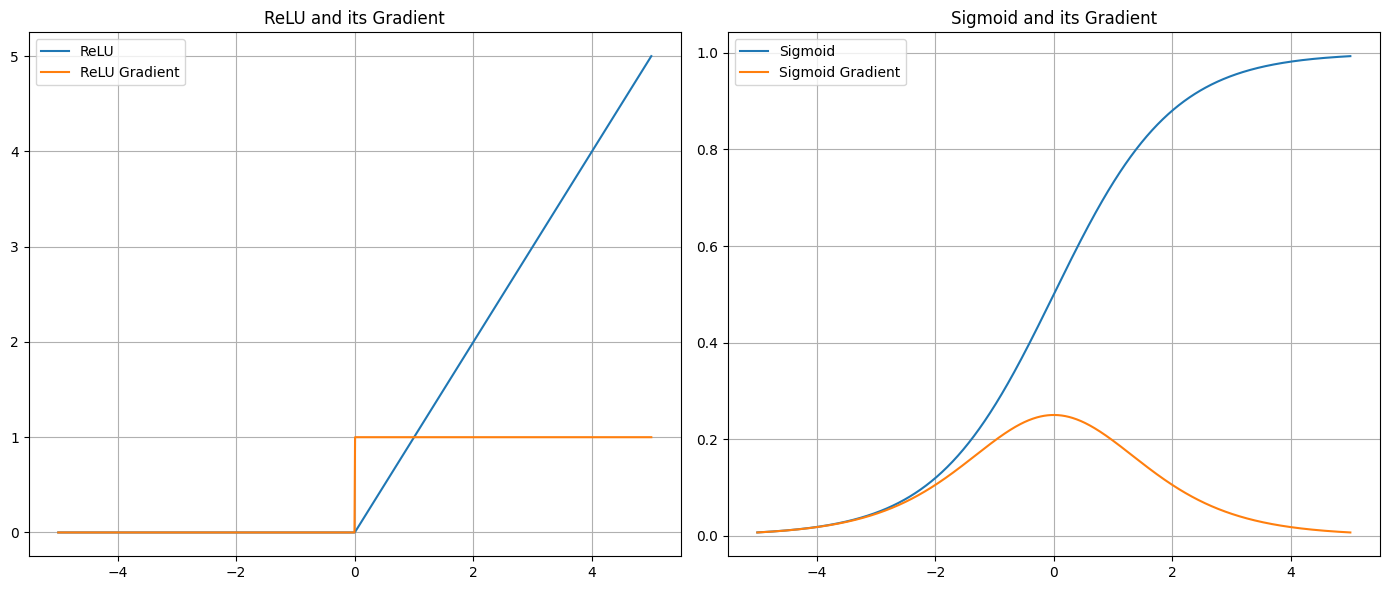

In [ ]:
visualize_gradients()

In [ ]:
def demonstrate_vanishing_gradient():
    # Ïã¨Ï∏µ Ïã†Í≤ΩÎßùÏóêÏÑúÏùò Í∏∞Ïö∏Í∏∞ ÏÜåÏã§ Î¨∏Ï†ú ÏãúÎÆ¨Î†àÏù¥ÏÖò
    n_layers = 100  # Ï∏µÏùò Ïàò

    # Ï¥àÍ∏∞ Í∑∏ÎûòÎîîÏñ∏Ìä∏
    initial_gradient = torch.tensor(1.0)

    # ReLUÏôÄ SigmoidÏùò Í∑∏ÎûòÎîîÏñ∏Ìä∏ Ï†ÑÌåå ÎπÑÍµê
    '''ÏΩîÎìú ÏûëÏÑ±'''
    #relu_gradients = [...]
    #sigmoid_gradients = [...]


    # ÏûÑÏùòÏùò ÏûÖÎ†•Í∞í (ÏñëÏàòÎäî ReLUÍ∞Ä Í∑∏ÎûòÎîîÏñ∏Ìä∏Î•º 1Î°ú Ïú†ÏßÄ)
    x_relu_positive = torch.tensor(0.5)
    # ÏûÑÏùòÏùò ÏûÖÎ†•Í∞í (SigmoidÎäî ÎåÄÎ∂ÄÎ∂ÑÏùò Í≤ΩÏö∞ Í∑∏ÎûòÎîîÏñ∏Ìä∏Í∞Ä 0.25 ÎØ∏Îßå)
    x_sigmoid = torch.tensor(0.0)  # SigmoidÏùò Í∑∏ÎûòÎîîÏñ∏Ìä∏Í∞Ä ÏµúÎåÄÏù∏ ÏßÄÏ†ê

    current_relu_grad = initial_gradient
    current_sigmoid_grad = initial_gradient

    for i in range(1, n_layers):
        # ReLU Í∑∏ÎûòÎîîÏñ∏Ìä∏ Ï†ÑÌåå
        '''ÏΩîÎìú ÏûëÏÑ±'''


        # Sigmoid Í∑∏ÎûòÎîîÏñ∏Ìä∏ Ï†ÑÌåå
        '''ÏΩîÎìú ÏûëÏÑ±'''


    # ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(10, 6))
    plt.semilogy(relu_gradients, label='ReLU Gradient (x > 0)')
    plt.semilogy(sigmoid_gradients, label='Sigmoid Gradient (x = 0)')
    plt.grid(True)
    plt.xlabel('Layer')
    plt.ylabel('Gradient Magnitude (log scale)')
    plt.title('Vanishing Gradient Problem Demonstration')
    plt.legend()
    plt.show()

    print(f"ReLU Í∑∏ÎûòÎîîÏñ∏Ìä∏ (100Ï∏µ ÌõÑ): {relu_gradients[-1]:.10f}")
    print(f"Sigmoid Í∑∏ÎûòÎîîÏñ∏Ìä∏ (100Ï∏µ ÌõÑ): {sigmoid_gradients[-1]:.10f}")

    # Sigmoid Ï∂îÍ∞Ä ÌôïÏù∏ - Í∑πÎã®Ï†ÅÏù∏ ÏûÖÎ†•Í∞íÏóêÏÑú
    x_extreme = torch.tensor(5.0)  # Îß§Ïö∞ ÌÅ∞ ÏñëÏàò
    extreme_sigmoid_grads = [initial_gradient.item()]
    current_grad = initial_gradient

    for i in range(1, n_layers):
        current_grad = CustomSigmoid.backward(x_extreme, current_grad)
        extreme_sigmoid_grads.append(current_grad.item())

    print(f"Í∑πÎã®Ï†ÅÏù∏ ÏûÖÎ†•(x=5)ÏóêÏÑú Sigmoid Í∑∏ÎûòÎîîÏñ∏Ìä∏ (100Ï∏µ ÌõÑ): {extreme_sigmoid_grads[-1]:.10e}")


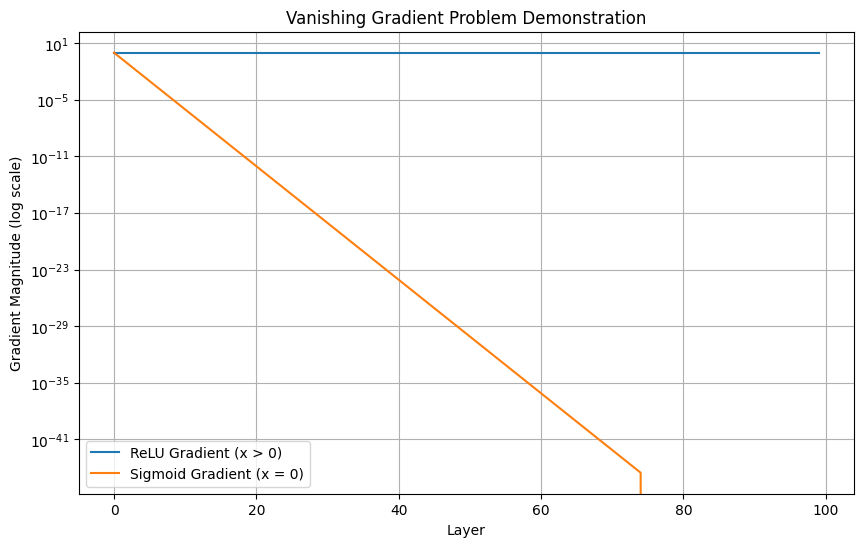

ReLU Í∑∏ÎûòÎîîÏñ∏Ìä∏ (100Ï∏µ ÌõÑ): 1.0000000000
Sigmoid Í∑∏ÎûòÎîîÏñ∏Ìä∏ (100Ï∏µ ÌõÑ): 0.0000000000
Í∑πÎã®Ï†ÅÏù∏ ÏûÖÎ†•(x=5)ÏóêÏÑú Sigmoid Í∑∏ÎûòÎîîÏñ∏Ìä∏ (100Ï∏µ ÌõÑ): 0.0000000000e+00


In [ ]:
demonstrate_vanishing_gradient()